<a href="https://colab.research.google.com/github/gabipalacios/Python/blob/main/VALOR_Tabla_Normalizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from google.colab import drive
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/1Empleos/VALOR/1bbddPhyton/PlataformaNorm/pa_otorgados.csv', index_col='id_financial')
Financial = pd.read_csv('/content/drive/MyDrive/1Empleos/VALOR/1bbddPhyton/PlataformaNorm/dwh_vales.csv', index_col='id') # Set 'id' as index here

Mounted at /content/drive


In [2]:
print(df.shape)
print(Financial.shape)

(3815, 111)
(7629, 36)


In [3]:
Financial.head()

,fecha_creacion,ult_fecha_update,monto_total,plazo,cuota,tea,fecha_emision,fecha_primer_vto,fecha_ult_vto,solicitud,tipo_desembolso,evaluacion_id,monto_cancelacion,monto_cancelacion_fecha_calculo,saldo,dias_atraso_max,dias_atraso_hoy,cuotas_devengadas,fecha_ult_pago,meses_con_pagos,ingresos,estado,fecha_estado,tipo_de_vale,tipo_de_cancelacion,referencia_a_vale_anterior,indica_si_el_vale_fue_vendido,documento,nro_solic,monto,es_plataforma,dias_desde_primer_vto,mora,30@3,fpd,anio_mes_vale
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60277,2025-06-11 08:58:38,2025-06-11 08:58:38,68316.00,12,5693.00,105.00,2024-01-02,2024-02-12,2025-01-11,60277,REDCOB,0,0.00,2025-06-11,0.00,353,0,12,2025-02-27,1,3506.17,P,2025-06-11,0,0,0,1,46658239,23480.00,41000.00,0,485,1.00,1.00,0.00,2024-01
60281,2025-06-11 08:58:38,2025-06-11 08:58:38,53136.00,24,2214.00,130.00,2024-01-02,2024-02-07,2026-01-07,60281,REDCOB,0,0.00,2025-06-11,0.00,189,0,17,2024-11-12,5,10282.34,P,2025-06-11,0,1,0,0,10950471,23483.00,20000.00,0,490,1.00,1.00,0.00,2024-01
60283,2025-06-11 08:58:38,2025-06-11 08:58:38,66864.00,21,3184.00,105.00,2024-01-02,2024-02-15,2025-10-15,60283,REDCOB,0,0.00,2025-06-11,0.00,318,0,16,2025-02-27,2,4582.49,P,2025-06-11,0,0,0,1,53580455,23484.00,30000.00,0,482,1.00,1.00,0.00,2024-01
60284,2025-06-11 08:58:38,2025-06-11 08:58:38,93276.00,18,5182.00,90.00,2024-01-03,2024-02-15,2025-07-15,60284,REDCOB,0,0.00,2025-06-11,0.00,257,0,16,2025-02-27,4,11695.22,P,2025-06-11,0,0,0,1,26445002,23485.00,49000.00,0,482,1.00,1.00,0.00,2024-01
60285,2025-06-11 08:58:38,2025-06-11 08:58:38,49395.00,15,3293.00,90.00,2024-01-03,2024-02-15,2025-04-15,60285,REDCOB,0,0.00,2025-06-11,0.00,4,0,15,2024-10-19,9,12579.55,C,2025-06-11,0,2,0,0,17534602,23486.00,28000.00,0,482,0.00,0.00,0.00,2024-01


In [4]:
df.head()

,id_solicitud,id_usuario,cedula,fecha_ymd,canal,status,status_usuario,no_ofertable,no_of_desc,rpf_alert,fecha_nacimiento,edad,genero,estado_cliente,meses_con_pagos,dias_atraso_max,tiene_vale_activo,deuda_pa,utm_source,utm_medium,utm_campaign,utm_content,utm_term,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,dispositivo_modelo,sist_op_familia,localidad,departamento,cdr_periodo,cdr_peor_calificacion,cdr_tiene_quita,cdr_tiene_garantia,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_cant_inst_dda,cdr_porc_dda_1c,cdr_sum_deudas_1c_ui,cdr_peorcatbcu1m,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,clr_fecha,clr_score,clr_accion,clr_explicacion,clr_detalle_consultas,clr_detalle_cancelaciones,clr_detalle_incumplimientos,clr_bp_fecha,clr_score_if,clr_bp_accion,clr_mayor_dias_atraso,clr_compromiso_bp_tc,clr_compromiso_bp_pr,clr_compromiso_bp_s,clr_apose_open_total,clr_apose_pri_act,clr_apose_peor_estado_total,clr_apose_cant_atraso,clr_apose_dif_open_close_u12m,clr_apose_deuda_vencida_ult_act,monto_hasta,plazo_hasta,exposicion_maxima,cuota_maxima,monto_maximo,mejor_esquema_pricing,id_vale,fecha_vale,monto,plazo,cuota,tasa,fecha_primer_vto,fecha_ultimo_vto,cargo_originacion,iva_cargo_originacion,tiene_cargo_adm,tiene_seguro,tipo_vale,fpd4,fpd30,valor_ui,anio_mes_sol
id_financial,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60556.00,LRA-204-425-362,USR-439-784-662,49581253,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,NaN,1992-04-01,31,femenino,S,0,0,0,0.00,SD,SD,SD,SD,SD,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712.77,20000.00,402.00,0.00,CLARO,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,0.00,0.00,857.17,17199.45,0.00,1.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31122.58,15.00,1.49,5640.25,30800.00,13.00,LVA-951-908-924,2024-02-21 11:16:50.275704,20000.00,12.00,2895.00,1.05,2024-03-11,2025-02-11,234.94,51.69,1.00,1.00,primary,0.00,0.00,5.87,2024-01
60746.00,LRA-952-655-967,USR-443-826-356,41106087,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,NaN,1975-10-13,48,femenino,S,0,0,0,0.00,SD,SD,SD,SD,SD,Primaria,emp_privado,Otros,28487.35,25500.00,531.00,0.00,MOVISTAR,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,0.00,0.00,0.00,107.66,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36713.02,21.00,1.65,9116.23,36800.00,13.00,LVA-578-509-642,2024-02-21 11:53:51.132514,25000.00,21.00,2709.00,1.05,2024-03-11,2025-11-11,234.94,51.69,1.00,1.00,primary,1.00,1.00,5.87,2024-01
60557.00,LRA-380-663-655,USR-635-210-917,43441742,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,NaN,1982-09-17,41,masculino,S,0,0,0,0.00,SD,SD,SD,SD,SD,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,46713.24,60000.00,508.00,0.00,ANTEL,gmail.com,Google,Apple,iPhone,iPhone,iOS,MONTEVIDEO,MONTEVIDEO,nov-2023,2a,0.00,0.00,5611.65,100232.16,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26454.19,15.00,0.91,9648.25,26500.00,13.00,LVA-700-106-570,2024-02-21 11:13:14.149029,26500.00,12.00,3780.00,1.05,2024-03-08,2025-02-05,234.94,51.69,1.00,1.00,primary,1.00,1.00,5.

In [5]:
#Pasar todos los campos numericos de df a valoes enteros

for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(0).astype(int)

for col in Financial.select_dtypes(include=np.number).columns:
    Financial[col] = Financial[col].fillna(0).astype(int)


In [6]:
# Select only the desired columns from Financial and add the prefix
Financial_selected = Financial[['mora', '30@3', 'fpd']].add_suffix('_Financial')

print("First 5 rows of Financial_selected:")
display(Financial_selected.head())

# Perform an inner join with df using the index, adding suffixes to handle overlapping columns
# Using lsuffix for df columns and rsuffix for Financial_selected columns
df = df.join(Financial_selected, how='inner', lsuffix='_df', rsuffix='_financial')


print(f"Shape of the DataFrame after joining with selected Financial columns: {df.shape}")
print("New columns added or potentially renamed from Financial:")
# Print the names of the columns that were in Financial_selected (now with rsuffix if overlapped)
print([col for col in df.columns if col.startswith('F') and col.endswith('_financial')])
# Also print the original prefixed names to see if they still exist with lsuffix
print([col for col in df.columns if col.startswith('F') and col.endswith('_df')])

print("\nFirst 5 rows of the updated DataFrame:")
display(df.head())

First 5 rows of Financial_selected:


,mora_Financial,30@3_Financial,fpd_Financial
id,,,
60277,1,1,0
60281,1,1,0
60283,1,1,0
60284,1,1,0
60285,0,0,0


Shape of the DataFrame after joining with selected Financial columns: (3799, 114)
New columns added or potentially renamed from Financial:
[]
[]

First 5 rows of the updated DataFrame:


,id_solicitud,id_usuario,cedula,fecha_ymd,canal,status,status_usuario,no_ofertable,no_of_desc,rpf_alert,fecha_nacimiento,edad,genero,estado_cliente,meses_con_pagos,dias_atraso_max,tiene_vale_activo,deuda_pa,utm_source,utm_medium,utm_campaign,utm_content,utm_term,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,dispositivo_modelo,sist_op_familia,localidad,departamento,cdr_periodo,cdr_peor_calificacion,cdr_tiene_quita,cdr_tiene_garantia,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_cant_inst_dda,cdr_porc_dda_1c,cdr_sum_deudas_1c_ui,cdr_peorcatbcu1m,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,clr_fecha,clr_score,clr_accion,clr_explicacion,clr_detalle_consultas,clr_detalle_cancelaciones,clr_detalle_incumplimientos,clr_bp_fecha,clr_score_if,clr_bp_accion,clr_mayor_dias_atraso,clr_compromiso_bp_tc,clr_compromiso_bp_pr,clr_compromiso_bp_s,clr_apose_open_total,clr_apose_pri_act,clr_apose_peor_estado_total,clr_apose_cant_atraso,clr_apose_dif_open_close_u12m,clr_apose_deuda_vencida_ult_act,monto_hasta,plazo_hasta,exposicion_maxima,cuota_maxima,monto_maximo,mejor_esquema_pricing,id_vale,fecha_vale,monto,plazo,cuota,tasa,fecha_primer_vto,fecha_ultimo_vto,cargo_originacion,iva_cargo_originacion,tiene_cargo_adm,tiene_seguro,tipo_vale,fpd4,fpd30,valor_ui,anio_mes_sol,mora_Financial,30@3_Financial,fpd_Financial
id_financial,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60556.00,LRA-204-425-362,USR-439-784-662,49581253,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,0,1992-04-01,31,femenino,S,0,0,0,0,SD,SD,SD,SD,SD,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712,20000,402,0,CLARO,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,0,0,857,17199,0,1,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,31122,15,1,5640,30800,13,LVA-951-908-924,2024-02-21 11:16:50.275704,20000,12,2895,1,2024-03-11,2025-02-11,234,51,1,1,primary,0,0,5,2024-01,1,1,0
60746.00,LRA-952-655-967,USR-443-826-356,41106087,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,0,1975-10-13,48,femenino,S,0,0,0,0,SD,SD,SD,SD,SD,Primaria,emp_privado,Otros,28487,25500,531,0,MOVISTAR,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,0,0,0,107,0,0,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,36713,21,1,9116,36800,13,LVA-578-509-642,2024-02-21 11:53:51.132514,25000,21,2709,1,2024-03-11,2025-11-11,234,51,1,1,primary,1,1,5,2024-01,1,1,1
60557.00,LRA-380-663-655,USR-635-210-917,43441742,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,0,1982-09-17,41,masculino,S,0,0,0,0,SD,SD,SD,SD,SD,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,46713,60000,508,0,ANTEL,gmail.com,Google,Apple,iPhone,iPhone,iOS,MONTEVIDEO,MONTEVIDEO,nov-2023,2a,0,0,5611,100232,1,1,1,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,26454,15,0,9648,26500,13,LVA-700-106-570,2024-02-21 11:13:14.149029,26500,12,3780,1,2024-03-08,2025-02-05,234,51,1,1,primary,1,1,5,2024-01,1,1,1
60552.00,LRA-460-603-964,USR-773-661-186,47988417,2024-01-22,WA,voucher_issued,id_verified,0,con_oferta,0,1998-04-12,25,femenino,S,0,0,0,0,SD,SD,SD,SD,SD,Secundaria - Ciclo Básico,indep_con_local,Empleo doméstico / Limpiador,24683,27000,448,0,ANTEL,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,CARMELO,COLONIA,nov-2023,1c,0,0,1396,29710,1,0,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0

In [7]:
#df.to_excel('df.xlsx')

## PREPROCESAMIENTO

Observamso que las features que tienen faltantes, pero para el caso del presente análisis no es necesario realizar limipieza ni agregar valores estadísticos.

In [8]:
# prompt: identificar en df, variables con faltantes > 30%, mostrar los % de faltantes y crear una lista con el resultado

# Identify columns with missing values > 30%
missing_percent = df.isnull().sum() / len(df) * 100
variables_to_drop = missing_percent[missing_percent > 30].index.tolist()

# Display the percentage of missing values for these variables
print("\nVariables with missing values > 30%:")
print(missing_percent[variables_to_drop].sort_values(ascending=False))

# Create a list with the identified variables
print("\nList of variables with missing values > 30%:")
variables_to_drop


Variables with missing values > 30%:
clr_mayor_dias_atraso         95.03
clr_bp_accion                 92.26
clr_bp_fecha                  92.26
clr_detalle_consultas         48.96
clr_explicacion               48.96
clr_fecha                     48.07
clr_accion                    48.07
clr_detalle_cancelaciones     48.07
clr_detalle_incumplimientos   48.07
dtype: float64

List of variables with missing values > 30%:


['clr_fecha',
 'clr_accion',
 'clr_explicacion',
 'clr_detalle_consultas',
 'clr_detalle_cancelaciones',
 'clr_detalle_incumplimientos',
 'clr_bp_fecha',
 'clr_bp_accion',
 'clr_mayor_dias_atraso']

Tanto el campo 'estado_cliente' como meses_con pagos, no es derminante para el análisis, dropeamos la misma. Aprovechamos y agragamos algunas a la lista.

In [9]:
#Quitamos variables nominales que no suman al análisis
columns_to_drop = ['id_solicitud',
                   'id_solicitud',
                   'id_usuario',
                   'cedula',
                   'canal',
                   'status',
                   'status_usuario',
                   'no_ofertable',
                   'no_of_desc',
                   'fecha_nacimiento',
                   'estado_cliente',
                   'meses_con_pagos',
                   'dias_atraso_max',
                   'tiene_vale_activo',
                   'deuda_pa',
                   'utm_source',
                   'utm_medium',
                   'utm_campaign',
                   'utm_content',
                   'utm_term',
                   'cdr_periodo',
                   'cdr_peor_calificacion',
                   'clr_fecha',
                   'clr_bp_fecha',
                   'clr_score_if',
                   'clr_bp_accion',
                   'clr_mayor_dias_atraso',
                   'clr_compromiso_bp_tc',
                   'clr_compromiso_bp_pr',
                   'clr_compromiso_bp_s',
                   'clr_apose_open_total',
                   'clr_apose_pri_act',
                   'clr_apose_peor_estado_total',
                   'clr_apose_cant_atraso',
                   'clr_apose_dif_open_close_u12m',
                   'clr_apose_deuda_vencida_ult_act',
                   'id_vale',
                   'fecha_vale',
                   'fecha_primer_vto',
                   'fecha_ultimo_vto',
                   'cargo_originacion',
                   'iva_cargo_originacion',
                   'tiene_cargo_adm',
                   'tiene_seguro',
                   'valor_ui',
                   'anio_mes_sol',
                   'dispositivo_modelo',#MUCHA VARIEDAD, HAY QUE BUSCAR LA MANERA DE AGRUPAR
                   'clr_detalle_consultas',#: 1928, AGRUPAR
                   'clr_detalle_cancelaciones',#: 313, AGRUPAR
                   #'clr_detalle_incumplimientos',#Ya eliminada en celda 647dbde3
                   'clr_explicaion',#Es lo mismo que accion
                   'cdr_tiene_quita', # Column with single unique value '0'
                   'cdr_tiene_garantia' # Column with single unique value '0'
]

# Drop the selected columns
df = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' prevents errors if a column doesn't exist

print(f"Shape of the DataFrame after dropping columns: {df.shape}")
print(df.columns)

Shape of the DataFrame after dropping columns: (3799, 64)
Index(['fecha_ymd', 'rpf_alert', 'edad', 'genero', 'nivel_educativo',
       'relacion_laboral', 'cargo', 'ingreso_estimado', 'ingreso_declarado',
       'scoring', 'tiene_tel_fijo', 'cel_carrier', 'email_dominio',
       'navegador_familia', 'dispositivo_marca', 'dispositivo_familia',
       'sist_op_familia', 'localidad', 'departamento',
       'cdr_max_contingencia_ui', 'cdr_sum_deudas_ui', 'cdr_tiene_brou',
       'cdr_tiene_banco_privado', 'cdr_tiene_oca', 'cdr_tiene_financiera',
       'cdr_cant_inst_dda', 'cdr_porc_dda_1c', 'cdr_sum_deudas_1c_ui',
       'cdr_peorcatbcu1m', 'cdr_ult_3m_1c', 'cdr_ult_3m_no_info',
       'cdr_ult_3m_malo', 'cdr_ult_3m_irregular', 'cdr_ult_6m_1c',
       'cdr_ult_6m_no_info', 'cdr_ult_6m_malo', 'cdr_ult_6m_irregular',
       'cdr_var_dda_ult_6m', 'cdr_ult_12m_1c', 'cdr_ult_12m_no_info',
       'cdr_ult_12m_malo', 'cdr_ult_12m_irregular', 'cdr_var_dda_ult_12m',
       'cdr_segmento', 'clr_sco

In [10]:
#definir campo  fecha_ymd en formato fecha

df['fecha_ymd'] = pd.to_datetime(df['fecha_ymd'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3799 entries, 60556.0 to 69385.0
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fecha_ymd                    3799 non-null   datetime64[ns]
 1   rpf_alert                    3799 non-null   int64         
 2   edad                         3799 non-null   int64         
 3   genero                       3799 non-null   object        
 4   nivel_educativo              3796 non-null   object        
 5   relacion_laboral             3796 non-null   object        
 6   cargo                        3796 non-null   object        
 7   ingreso_estimado             3799 non-null   int64         
 8   ingreso_declarado            3799 non-null   int64         
 9   scoring                      3799 non-null   int64         
 10  tiene_tel_fijo               3799 non-null   int64         
 11  cel_carrier                  3796 non-n

In [12]:
# Reorganizar valores de variables categóricas con criterio lógico (analizados previamente)
df.loc[~df['dispositivo_marca'].isin(['Apple']), 'dispositivo_marca'] = 'Android'
df.loc[df['sist_op_familia'] != 'iOS', 'sist_op_familia'] = 'Android'
df.loc[df['dispositivo_marca'] != 'Apple', 'dispositivo_marca'] = 'Android'
df.loc[~df['navegador_familia'].isin(['Facebook', 'Instagram']), 'navegador_familia'] = 'Web'


#Múltples categorias de regisetros, dejo sólo los 3 primeros caracteres de un campo

if 'dispositivo_familia' in df.columns:
  df['dispositivo_familia'] = df['dispositivo_familia'].astype(str).str[:3]
  print(f"Unique values for dispositivo_familia after truncation: {df['dispositivo_familia'].unique()}")
else:
  print("Column 'dispositivo_familia' not found in DataFrame.")

if 'dispositivo_familia' in df.columns:
  # Get value counts
  value_counts = df['dispositivo_familia'].value_counts()

  # Identify categories with less than 50 records
  categories_to_group = value_counts[value_counts < 50].index.tolist()

  # Replace these categories with 'NUM'
  df['dispositivo_familia'] = df['dispositivo_familia'].replace(categories_to_group, 'NUM')

  print(f"Unique values for dispositivo_familia after grouping: {df['dispositivo_familia'].unique()}")
  print(f"\nValue counts for dispositivo_familia after grouping:")
  print(df['dispositivo_familia'].value_counts())
else:
  print("Column 'dispositivo_familia' not found in DataFrame.")


Unique values for dispositivo_familia after truncation: ['K' 'iPh' 'Mot' '220' 'Sam' 'His' 'Mac' 'M20' '230' 'NCO' 'L62' 'Nok'
 'ZTE' 'Hua' 'Oth' 'nan' 'Gen' 'Xia' '210' 'VOG' '221' 'ELE' '211' 'YAL'
 'FRL' 'M21' '231' '503' 'NAM' 'MED' 'BNE' 'Eli' 'EML' 'STK' 'BOL' '612'
 'G63' 'Opp' 'JLN' 'iPa' 'LM-' '240' 'TEC' '510' '513' 'L65' 'E60' '500'
 'MP0' 'MGA' 'CTR' 'Z23' '241' 'T77' 'JKM' 'BV9' 'DUB' 'T76' 'NS6' '616']
Unique values for dispositivo_familia after grouping: ['K' 'iPh' 'Mot' '220' 'Sam' 'NUM' 'M20' '230' 'Hua' 'Oth' '231']

Value counts for dispositivo_familia after grouping:
dispositivo_familia
K      1092
Sam     749
Oth     512
iPh     498
NUM     307
231     169
Mot     134
220     105
230      90
Hua      88
M20      55
Name: count, dtype: int64


In [13]:
# Agrupamos registros muy abiertos, categorías con +100registros.

# Convert 'o_cargo' to object dtype for flexible replacement
df['cargo'] = df['cargo'].astype('object')

cargo_counts = df['cargo'].value_counts()
categories_to_group_cargo = cargo_counts[cargo_counts <= 100].index.tolist()

# Replace these categories with 'Otros'
df['cargo'] = df['cargo'].replace(categories_to_group_cargo, 'Otros')

# Convert 'o_cargo' back to category dtype
df['cargo'] = df['cargo'].astype('category')


print("\nValue counts for o_cargo after grouping categories with count <= 100 into 'Otros':")
print(df['cargo'].value_counts())
print("\nUnique values for Cargo after grouping:")
print(df['cargo'].unique())


Value counts for o_cargo after grouping categories with count <= 100 into 'Otros':
cargo
Otros                                       1741
Empleo doméstico / Limpiador                 393
Comerciante                                  333
BPS / AFAP                                   320
Vendedor / Auxiliar Comercio o Servicios     262
Administrativo / Contable / Oficinista       235
Cocinero                                     166
Albañil / Obrero Construcción                125
Obrero / Peon                                118
Enfermero / Personal Salud                   103
Name: count, dtype: int64

Unique values for Cargo after grouping:
['Vendedor / Auxiliar Comercio o Servicios', 'Otros', 'Enfermero / Personal Salud', 'Empleo doméstico / Limpiador', 'Cocinero', ..., 'BPS / AFAP', 'Albañil / Obrero Construcción', 'Obrero / Peon', 'Administrativo / Contable / Oficinista', NaN]
Length: 11
Categories (10, object): ['Administrativo / Contable / Oficinista', 'Albañil / Obrero Construcción

In [14]:
# Group specific categories in 'o_cargo'
df['cargo'] = df['cargo'].replace(['Militar / Policía / Bombero', 'Caja Militar / Policial','Profesional Universitario','Guardias Seguridad'], 'Seguridad&ProfUniv')
df['cargo'] = df['cargo'].replace(['Albañil / Obrero Construcción', 'Obrero / Peon'], 'Construccion')
print(df.cargo.unique())
print(df.cargo.value_counts())

['Vendedor / Auxiliar Comercio o Servicios', 'Otros', 'Enfermero / Personal Salud', 'Empleo doméstico / Limpiador', 'Cocinero', 'Comerciante', 'BPS / AFAP', 'Construccion', 'Administrativo / Contable / Oficinista', NaN]
Categories (9, object): ['Administrativo / Contable / Oficinista', 'Construccion', 'BPS / AFAP', 'Cocinero', ...,
                         'Empleo doméstico / Limpiador', 'Enfermero / Personal Salud', 'Otros',
                         'Vendedor / Auxiliar Comercio o Servicios']
cargo
Otros                                       1741
Empleo doméstico / Limpiador                 393
Comerciante                                  333
BPS / AFAP                                   320
Vendedor / Auxiliar Comercio o Servicios     262
Construccion                                 243
Administrativo / Contable / Oficinista       235
Cocinero                                     166
Enfermero / Personal Salud                   103
Name: count, dtype: int64


/tmp/ipython-input-14-1591704952.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['cargo'] = df['cargo'].replace(['Albañil / Obrero Construcción', 'Obrero / Peon'], 'Construccion')


In [15]:
#Dropeamos variables mucha varianza, y datos dudosos
columns_to_drop_low_variance = ['localidad']
df = df.drop(columns=columns_to_drop_low_variance, errors='ignore')

In [16]:
df['email_dominio'] = df['email_dominio'].apply(lambda x: 'hotmail.com' if 'outlook.com' in str(x).lower() else ('gmail.com' if 'gmail.com' in str(x).lower() else 'varios.com'))
print(df['email_dominio'].value_counts())

email_dominio
gmail.com      2995
varios.com      780
hotmail.com      24
Name: count, dtype: int64


In [17]:
# Agrupar los registros de df['o_edad'] en 4 grupos: Joven(hasta35), Joven2(36a45), Adulto(46a60), Jubilado(mayor a 60) y reemplazar las originales con el resultado.

def agrupar_edad(edad):
  if edad <= 35:
    return 'Joven'
  elif 36 <= edad <= 45:
    return 'Joven2'
  elif 46 <= edad <= 60:
    return 'Adulto'
  elif edad > 60:
    return 'Jubilado'
  else:
    return None # O algún otro valor para edades desconocidas

df['edad_grouped'] = df['edad'].apply(agrupar_edad)

print("\nConteo de valores para la columna 'edad' agrupada:")
print(df['edad_grouped'].value_counts())

print("\nPrimeras filas del DataFrame con la columna 'edad' agrupada:")
print(df[['edad_grouped']].head())


Conteo de valores para la columna 'edad' agrupada:
edad_grouped
Joven       1277
Adulto      1144
Joven2       947
Jubilado     431
Name: count, dtype: int64

Primeras filas del DataFrame con la columna 'edad' agrupada:
             edad_grouped
id_financial             
60556.00            Joven
60746.00           Adulto
60557.00           Joven2
60552.00            Joven
60566.00           Joven2


In [18]:
# Completar registros vacíos de fpd con valor=0

col_to_fill_zero = ['fpd_Financial','mora_Financial','30@3_Financial']

# Check if all columns in the list exist in the DataFrame
if set(col_to_fill_zero).issubset(df.columns):
    df[col_to_fill_zero] = df[col_to_fill_zero].fillna(0)
    print(f"Filled missing values in columns: {col_to_fill_zero} with 0")
    print(f"\nChecking for missing values in the specified columns after filling with 0:")
    print(df[col_to_fill_zero].isnull().sum())
else:
    # Identify which columns are missing
    missing_cols = [col for col in col_to_fill_zero if col not in df.columns]
    print(f"The following columns were not found in the DataFrame: {missing_cols}")
    print("Could not fill missing values as the columns do not exist.")

Filled missing values in columns: ['fpd_Financial', 'mora_Financial', '30@3_Financial'] with 0

Checking for missing values in the specified columns after filling with 0:
fpd_Financial     0
mora_Financial    0
30@3_Financial    0
dtype: int64


In [19]:
#Redondear todos los valores de los campos numéricos, número entero

# Iterate through all columns in the DataFrame
for col in df.columns:
    # Check if the column has a numeric data type
    if pd.api.types.is_numeric_dtype(df[col]):
        # Round the column to the nearest integer and convert to int
        df[col] = df[col].round(0).astype(int)

print("All numeric columns in the DataFrame have been rounded to the nearest integer.")
display(df.head())

All numeric columns in the DataFrame have been rounded to the nearest integer.


,fecha_ymd,rpf_alert,edad,genero,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,sist_op_familia,departamento,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_cant_inst_dda,cdr_porc_dda_1c,cdr_sum_deudas_1c_ui,cdr_peorcatbcu1m,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,clr_score,clr_accion,clr_explicacion,clr_detalle_incumplimientos,monto_hasta,plazo_hasta,exposicion_maxima,cuota_maxima,monto_maximo,mejor_esquema_pricing,monto,plazo,cuota,tasa,tipo_vale,fpd4,fpd30,mora_Financial,30@3_Financial,fpd_Financial,edad_grouped
id_financial,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60556.00,2024-01-21,0,31,femenino,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712,20000,402,0,CLARO,gmail.com,Web,Android,K,Android,MONTEVIDEO,857,17199,0,1,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,NaN,NaN,NaN,31122,15,1,5640,30800,13,20000,12,2895,1,primary,0,0,1,1,0,Joven
60746.00,2024-01-21,0,48,femenino,Primaria,emp_privado,Otros,28487,25500,531,0,MOVISTAR,gmail.com,Web,Android,K,Android,MONTEVIDEO,0,107,0,0,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,NaN,NaN,NaN,36713,21,1,9116,36800,13,25000,21,2709,1,primary,1,1,1,1,1,Adulto
60557.00,2024-01-21,0,41,masculino,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,46713,60000,508,0,ANTEL,gmail.com,Web,Apple,iPh,iOS,MONTEVIDEO,5611,100232,1,1,1,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,NaN,NaN,NaN,26454,15,0,9648,26500,13,26500,12,3780,1,primary,1,1,1,1,1,Joven2
60552.00,2024-01-22,0,25,femenino,Secundaria - Ciclo Básico,indep_con_local,Empleo doméstico / Limpiador,24683,27000,448,0,ANTEL,gmail.com,Web,Android,K,Android,COLONIA,1396,29710,1,0,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,NaN,NaN,NaN,43190,18,1,6417,42900,13,42000,18,4808,1,primary,1,1,1,1,1,Joven
60566.00,2024-01-22,0,39,femenino,Secundaria - Ciclo Básico,indep_sin_local,Cocinero,23254,30000,402,0,MOVISTAR,gmail.com,Web,Android,Mot,Android,MONTEVIDEO,1156,7679,0,1,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,NaN,NaN,NaN,33827,21,1,6913,33900,13,33500,21,3560,1,primary,0,0,1,1,0,Joven2


In [20]:
#Transormar formato objet a categorico, toas las variables del df

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [21]:
# identificar los campos con valor unico
columns_to_drop_single_value = []
for col in df.columns:
    if df[col].nunique() == 1:
        columns_to_drop_single_value.append(col)

print("Columnas con un único valor:")
for col in columns_to_drop_single_value:
    print(f"- '{col}': {df[col].unique()[0]}")

#quitarlos
columns_to_drop_single_value = ['cdr_tiene_quita', 'cdr_tiene_garantia']
df = df.drop(columns=columns_to_drop_single_value, errors='ignore')

print(f"Shape of the DataFrame after dropping columns with a single unique value: {df.shape}")

Columnas con un único valor:
Shape of the DataFrame after dropping columns with a single unique value: (3799, 64)


In [22]:
# Combinar relación laboral y nivel educativo
df['relacion_educacion_combinada'] = df['relacion_laboral'].astype(str) + '_' + df['nivel_educativo'].astype(str)

print("\nPrimeras filas del DataFrame con la nueva columna combinada:")
display(df[['relacion_laboral', 'nivel_educativo', 'relacion_educacion_combinada']].head())

print("\nConteo de valores para la nueva columna combinada:")
print(df['relacion_educacion_combinada'].value_counts())

combined_counts = df['relacion_educacion_combinada'].value_counts()

# Calcular el umbral para agrupar (10% del total de registros)
total_records = len(df)
grouping_threshold = total_records * 0.03
print(f"\nUmbral de agrupación establecido al 3% de registros: {grouping_threshold:.0f}")

#Identificar los campos con menos del umbral calculado y agruparlos en registro genérico
categories_to_group = combined_counts[combined_counts < grouping_threshold].index.tolist()

df['relacion_educacion_combinada'] = df['relacion_educacion_combinada'].replace(categories_to_group, 'Otros')

df['relacion_educacion_combinada'] = df['relacion_educacion_combinada'].astype('category')

print("\nConteo de valores para 'relacion_educacion_combinada' después de agrupar (criterio < 10% de registros):")
print(df['relacion_educacion_combinada'].value_counts())


Primeras filas del DataFrame con la nueva columna combinada:


,relacion_laboral,nivel_educativo,relacion_educacion_combinada
id_financial,,,
60556.00,indep_sin_local,Secundaria - Bachillerato,indep_sin_local_Secundaria - Bachillerato
60746.00,emp_privado,Primaria,emp_privado_Primaria
60557.00,emp_publico,Secundaria - Ciclo Básico,emp_publico_Secundaria - Ciclo Básico
60552.00,indep_con_local,Secundaria - Ciclo Básico,indep_con_local_Secundaria - Ciclo Básico
60566.00,indep_sin_local,Secundaria - Ciclo Básico,indep_sin_local_Secundaria - Ciclo Básico



Conteo de valores para la nueva columna combinada:
relacion_educacion_combinada
emp_privado_Secundaria - Ciclo Básico        566
emp_privado_Secundaria - Bachillerato        388
indep_sin_local_Secundaria - Ciclo Básico    330
emp_privado_Primaria                         211
emp_privado_Educación Terciaria              196
otros_Secundaria - Ciclo Básico              192
indep_con_local_Secundaria - Ciclo Básico    172
indep_sin_local_Secundaria - Bachillerato    162
indep_sin_local_Primaria                     156
emp_publico_Secundaria - Ciclo Básico        148
jubilado_Secundaria - Ciclo Básico           147
emp_publico_Educación Terciaria              137
jubilado_Primaria                            126
emp_publico_Secundaria - Bachillerato        122
indep_con_local_Secundaria - Bachillerato    109
otros_Primaria                               107
jubilado_Secundaria - Bachillerato            97
indep_sin_local_Educación Terciaria           92
otros_Secundaria - Bachillerato      

In [23]:
print(df['clr_accion'].value_counts())

clr_accion
C2            331
C1_2_3        310
C1_3_3        299
C1_3_6        247
C1_3_1        240
C4            222
C3            130
C6_1_1_2       54
NO_DATA        34
C6_1_6         21
C6_1_1         19
C6_2_1_2       19
C6_3_1_2       15
C6_1_3         10
C6_2_1          7
C5              3
C6_1_1_NSF      3
C6_2_6          2
C6_2_3          2
C6_3_1          2
C6_1_3_NSF      1
C6_1_6_NSF      1
C6_3_6          1
Name: count, dtype: int64


In [24]:
#reagrupar ['clr_accion'] cuando hay menos de 50 registros en vategoria 'varios'

clr_accion_counts = df['clr_accion'].value_counts()

# Identify categories with less than 50 records
categories_to_group_clr_accion = clr_accion_counts[clr_accion_counts < 50].index.tolist()

# Replace these categories with 'varios'
df['clr_accion'] = df['clr_accion'].replace(categories_to_group_clr_accion, 'varios')

print("\nValue counts for clr_accion after grouping categories with count < 50 into 'varios':")
print(df['clr_accion'].value_counts())
print("\nUnique values for clr_accion after grouping:")
print(df['clr_accion'].unique())


Value counts for clr_accion after grouping categories with count < 50 into 'varios':
clr_accion
C2          331
C1_2_3      310
C1_3_3      299
C1_3_6      247
C1_3_1      240
C4          222
varios      140
C3          130
C6_1_1_2     54
Name: count, dtype: int64

Unique values for clr_accion after grouping:
[NaN, 'C4', 'C1_3_6', 'C1_3_3', 'varios', 'C3', 'C1_2_3', 'C2', 'C6_1_1_2', 'C1_3_1']
Categories (9, object): ['C1_2_3', 'C1_3_1', 'C1_3_3', 'C1_3_6', ..., 'C3', 'C4', 'varios', 'C6_1_1_2']


/tmp/ipython-input-24-3088371730.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['clr_accion'] = df['clr_accion'].replace(categories_to_group_clr_accion, 'varios')


In [25]:
# Drop the 'clr_detalle_incumplimientos' column
df = df.drop(columns=['clr_detalle_incumplimientos'], errors='ignore')
df = df.drop(columns=['clr_explicacion'], errors='ignore')

In [26]:
# prompt: separar campos a otro dataset, los campos son: fpd4   fpd30   mora_Financial   0@3_Financial   fpd_Financial, dejarlos relacionados por el id del dataset df para usar en otro momento. crear un nuevo dataset llamado df_control y eliminarlas del df

# Create df_control with the specified columns and the index
columns_for_control = ['fpd4','fpd30','fpd_Financial', 'mora_Financial', '30@3_Financial']
df_control = df[columns_for_control].copy()

# Print the shape and head of the new df_control DataFrame
print(f"Shape of the new df_control DataFrame: {df_control.shape}")
print("\nFirst 5 rows of the new df_control DataFrame:")
display(df_control.head())

# Drop the specified columns from the original df
df = df.drop(columns=columns_for_control, errors='ignore')


Shape of the new df_control DataFrame: (3799, 5)

First 5 rows of the new df_control DataFrame:


,fpd4,fpd30,fpd_Financial,mora_Financial,30@3_Financial
id_financial,,,,,
60556.00,0,0,0,1,1
60746.00,1,1,1,1,1
60557.00,1,1,1,1,1
60552.00,1,1,1,1,1
60566.00,0,0,0,1,1


In [27]:
['cdr_ult_3m_no_info','cdr_ult_3m_malo','cdr_ult_3m_irregular','cdr_ult_6m_no_info','cdr_ult_6m_malo','cdr_ult_6m_irregular','cdr_ult_12m_no_info','cdr_ult_12m_malo','cdr_ult_12m_irregular','exposicion_maxima']

['cdr_ult_3m_no_info',
 'cdr_ult_3m_malo',
 'cdr_ult_3m_irregular',
 'cdr_ult_6m_no_info',
 'cdr_ult_6m_malo',
 'cdr_ult_6m_irregular',
 'cdr_ult_12m_no_info',
 'cdr_ult_12m_malo',
 'cdr_ult_12m_irregular',
 'exposicion_maxima']

In [28]:
categorical_cols = ['cdr_ult_3m_no_info','cdr_ult_3m_malo','cdr_ult_3m_irregular','cdr_ult_6m_no_info','cdr_ult_6m_malo','cdr_ult_6m_irregular','cdr_ult_12m_no_info','cdr_ult_12m_malo','cdr_ult_12m_irregular','exposicion_maxima']

for col in categorical_cols:
  if col in df.columns:
    df[col] = df[col].astype('category')
    print(f"Converted column '{col}' to categorical.")
  else:
    print(f"Column '{col}' not found in DataFrame.")

print("\nData types after converting specified columns:")

Converted column 'cdr_ult_3m_no_info' to categorical.
Converted column 'cdr_ult_3m_malo' to categorical.
Converted column 'cdr_ult_3m_irregular' to categorical.
Converted column 'cdr_ult_6m_no_info' to categorical.
Converted column 'cdr_ult_6m_malo' to categorical.
Converted column 'cdr_ult_6m_irregular' to categorical.
Converted column 'cdr_ult_12m_no_info' to categorical.
Converted column 'cdr_ult_12m_malo' to categorical.
Converted column 'cdr_ult_12m_irregular' to categorical.
Converted column 'exposicion_maxima' to categorical.

Data types after converting specified columns:


In [29]:
for col in categorical_cols:
  if col in df.columns:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())
  else:
    print(f"Column '{col}' not found in DataFrame.")


Value counts for column: cdr_ult_3m_no_info
cdr_ult_3m_no_info
0    3321
1     438
2      36
3       4
Name: count, dtype: int64

Value counts for column: cdr_ult_3m_malo
cdr_ult_3m_malo
0    3751
1      27
2      15
3       6
Name: count, dtype: int64

Value counts for column: cdr_ult_3m_irregular
cdr_ult_3m_irregular
0    3363
1     302
2      94
3      40
Name: count, dtype: int64

Value counts for column: cdr_ult_6m_no_info
cdr_ult_6m_no_info
0    3236
1     434
2      38
4      36
5      32
3      20
6       3
Name: count, dtype: int64

Value counts for column: cdr_ult_6m_malo
cdr_ult_6m_malo
0    3674
1      43
3      26
2      25
4      16
5       9
6       6
Name: count, dtype: int64

Value counts for column: cdr_ult_6m_irregular
cdr_ult_6m_irregular
0    3155
1     354
2     138
3      72
4      38
5      22
6      20
Name: count, dtype: int64

Value counts for column: cdr_ult_12m_no_info
cdr_ult_12m_no_info
0     3023
2      454
1       43
5       42
4       41
3       34
8 

In [30]:
cols_to_check = ['cdr_ult_3m_no_info','cdr_ult_3m_malo','cdr_ult_3m_irregular','cdr_ult_6m_no_info','cdr_ult_6m_malo','cdr_ult_6m_irregular','cdr_ult_12m_no_info','cdr_ult_12m_malo','cdr_ult_12m_irregular','exposicion_maxima']
total_rows = len(df)
threshold = total_rows * 0.10

for col in cols_to_check:
  if col in df.columns:
    # Convert to string to handle potential mixed types before value_counts
    df[col] = df[col].astype(str)
    value_counts = df[col].value_counts()
    # Identify categories with count less than 10% of total rows
    categories_to_group = value_counts[value_counts < threshold].index.tolist()

    if categories_to_group:
      # Get the last category value
      last_category = value_counts.index[-1]
      # Replace identified categories with the last category value prefixed with '+'
      df[col] = df[col].replace(categories_to_group, 'hasta' + str(last_category))
      print(f"Grouped categories in column '{col}' below 10% threshold into '+{last_category}'.")
      print(f"\nValue counts for column '{col}' after grouping:")
      print(df[col].value_counts())
    else:
      print(f"No categories in column '{col}' below the 10% threshold to group.")

    # Optionally convert back to category after grouping if needed for other steps
    # df[col] = df[col].astype('category') # Uncomment if you need to convert back to category
  else:
    print(f"Column '{col}' not found in DataFrame.")

#print("\nFirst 5 rows of the DataFrame after processing specified columns:")
#display(df[cols_to_check].head())


Grouped categories in column 'cdr_ult_3m_no_info' below 10% threshold into '+3'.

Value counts for column 'cdr_ult_3m_no_info' after grouping:
cdr_ult_3m_no_info
0         3321
1          438
hasta3      40
Name: count, dtype: int64
Grouped categories in column 'cdr_ult_3m_malo' below 10% threshold into '+3'.

Value counts for column 'cdr_ult_3m_malo' after grouping:
cdr_ult_3m_malo
0         3751
hasta3      48
Name: count, dtype: int64
Grouped categories in column 'cdr_ult_3m_irregular' below 10% threshold into '+3'.

Value counts for column 'cdr_ult_3m_irregular' after grouping:
cdr_ult_3m_irregular
0         3363
hasta3     436
Name: count, dtype: int64
Grouped categories in column 'cdr_ult_6m_no_info' below 10% threshold into '+6'.

Value counts for column 'cdr_ult_6m_no_info' after grouping:
cdr_ult_6m_no_info
0         3236
1          434
hasta6     129
Name: count, dtype: int64
Grouped categories in column 'cdr_ult_6m_malo' below 10% threshold into '+6'.

Value counts for colum

## VISUALIZACIÓN DE CATEGORIAS

Variables categóricas:
Index(['genero', 'nivel_educativo', 'relacion_laboral', 'cargo', 'cel_carrier',
       'email_dominio', 'navegador_familia', 'dispositivo_marca',
       'dispositivo_familia', 'sist_op_familia', 'departamento',
       'cdr_peorcatbcu1m', 'cdr_ult_3m_no_info', 'cdr_ult_3m_malo',
       'cdr_ult_3m_irregular', 'cdr_ult_6m_no_info', 'cdr_ult_6m_malo',
       'cdr_ult_6m_irregular', 'cdr_ult_12m_no_info', 'cdr_ult_12m_malo',
       'cdr_ult_12m_irregular', 'clr_accion', 'exposicion_maxima', 'tipo_vale',
       'edad_grouped', 'relacion_educacion_combinada'],
      dtype='object')


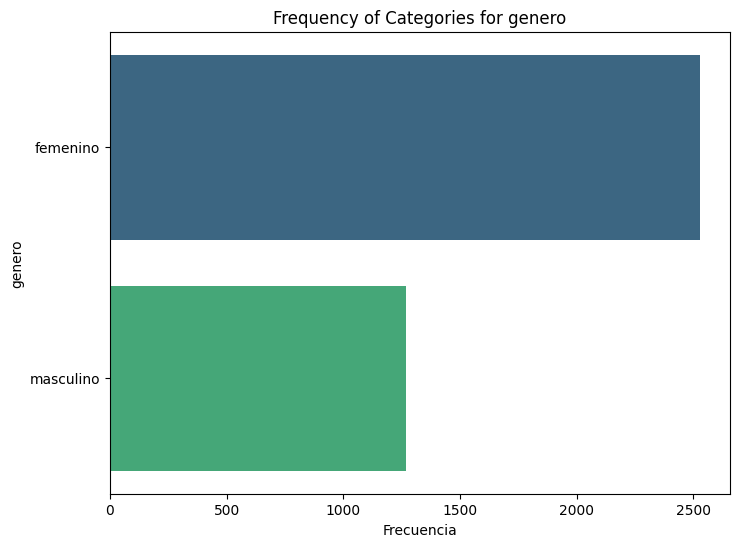

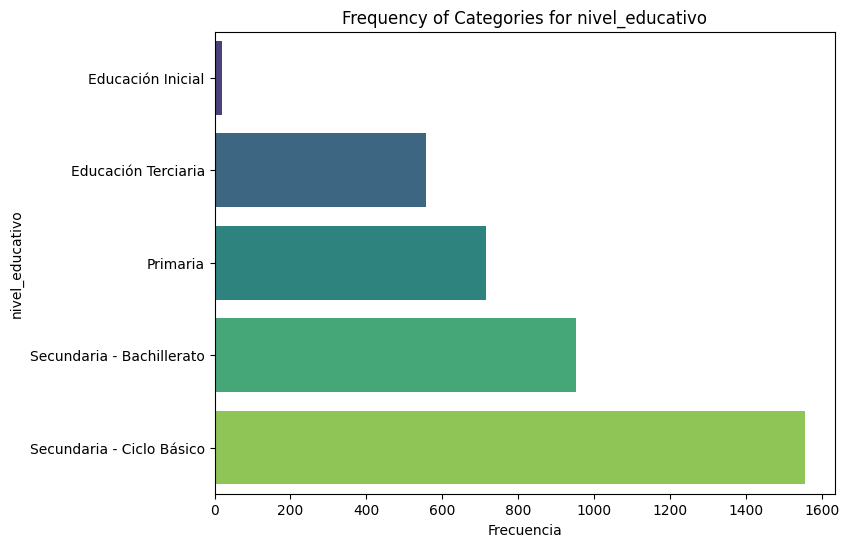

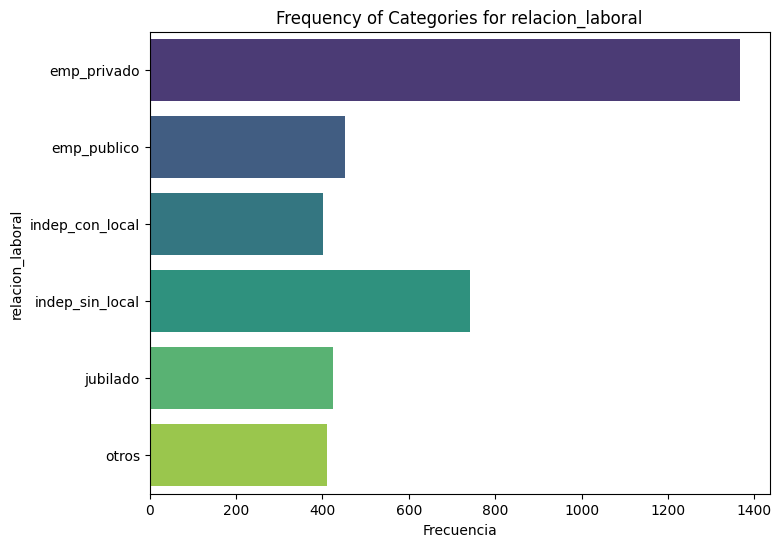

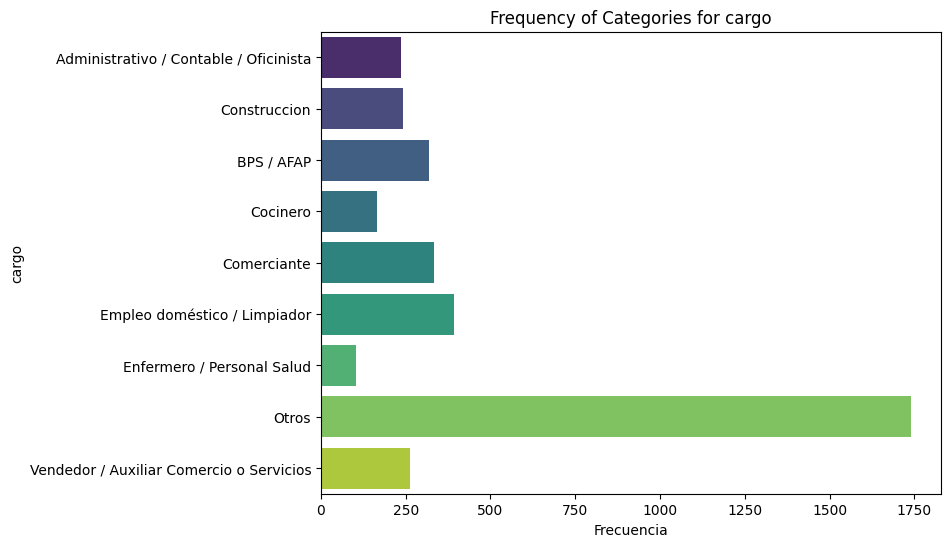

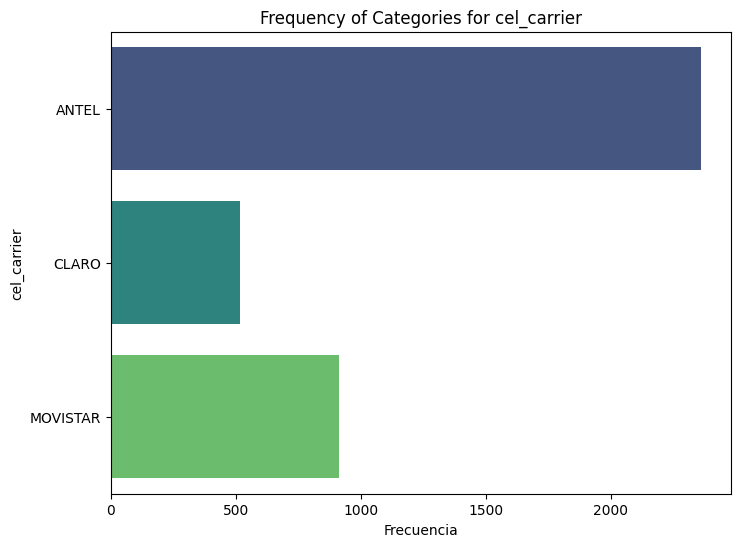

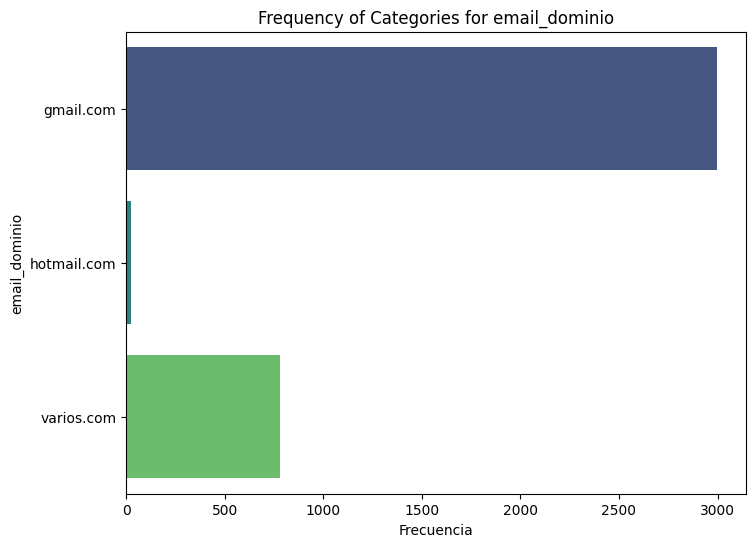

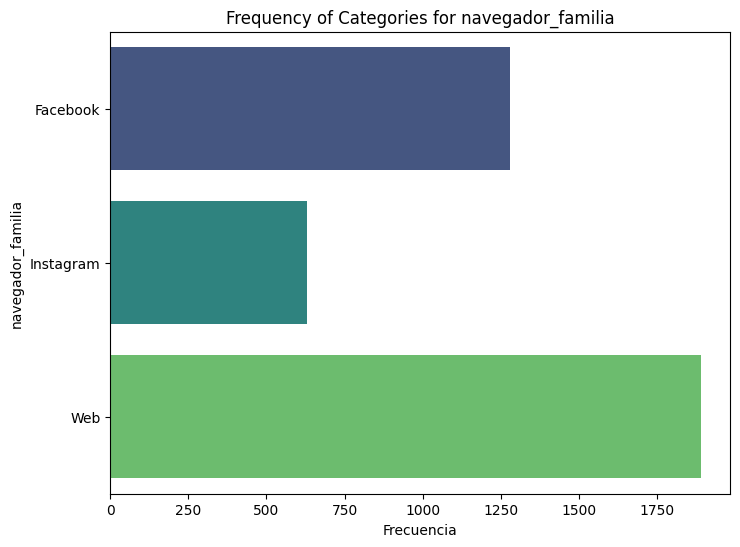

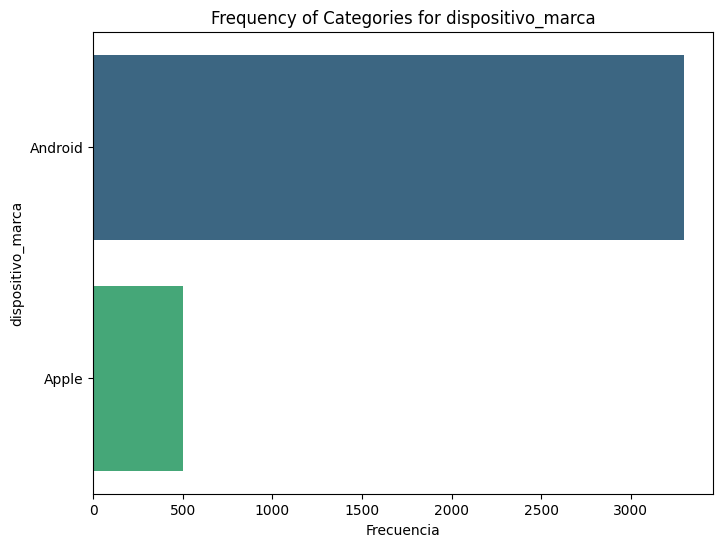

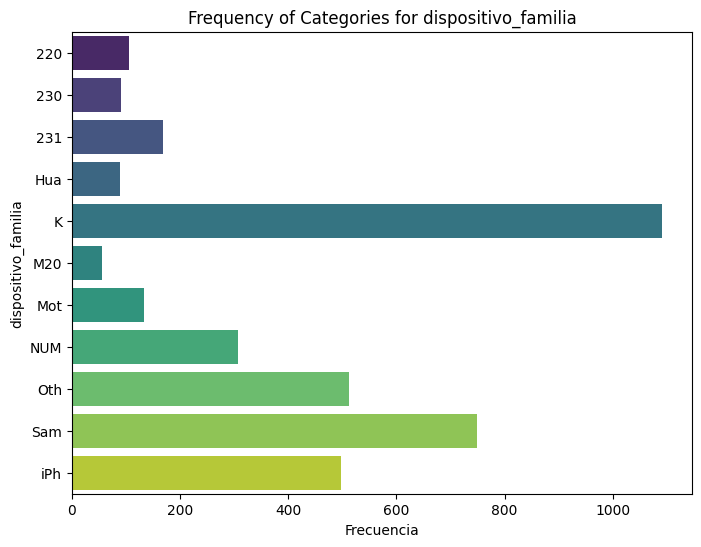

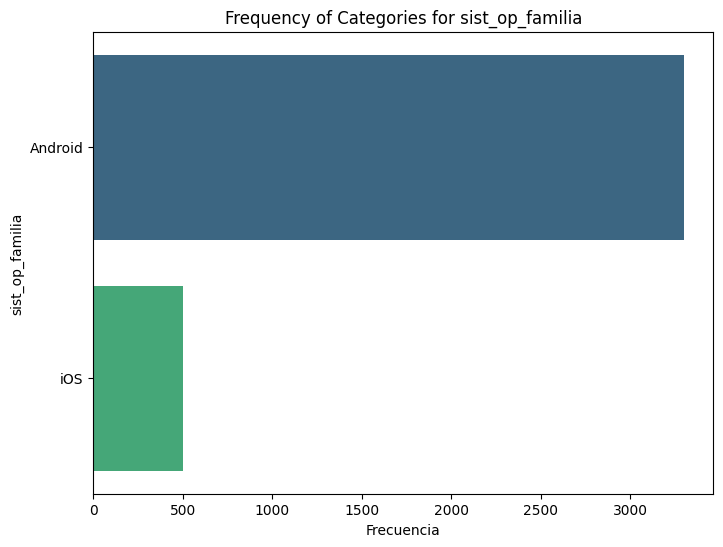

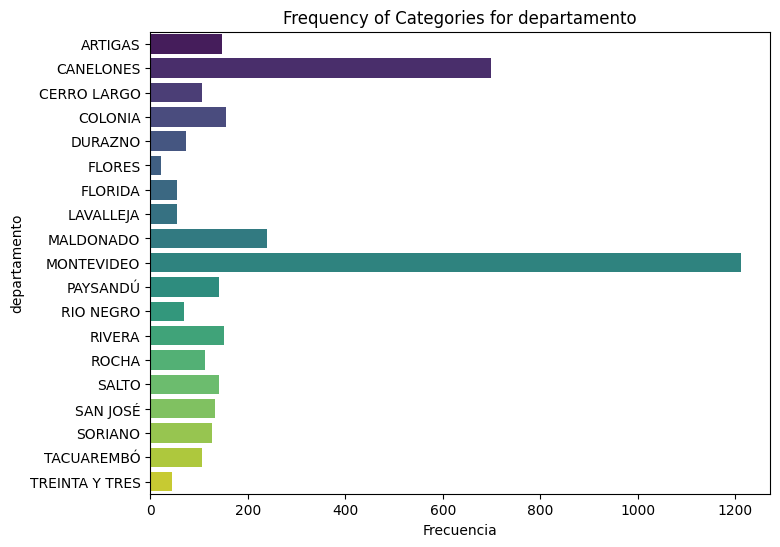

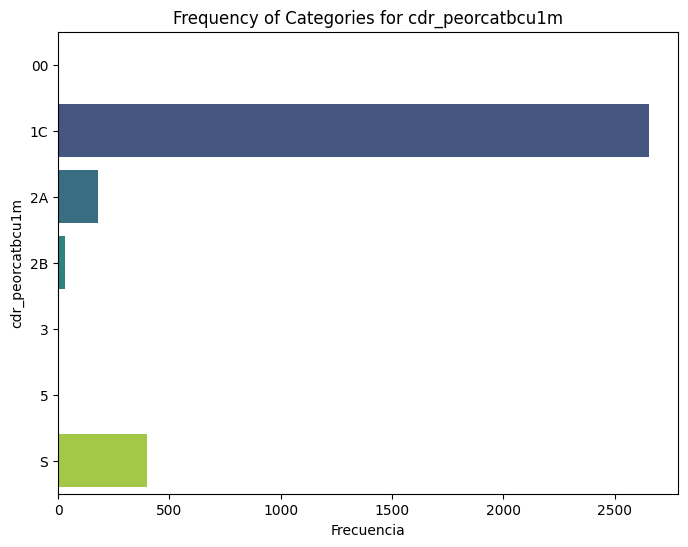

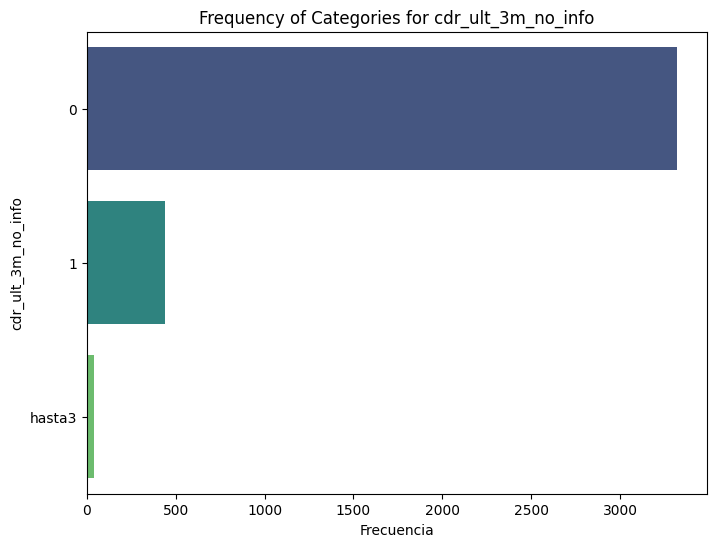

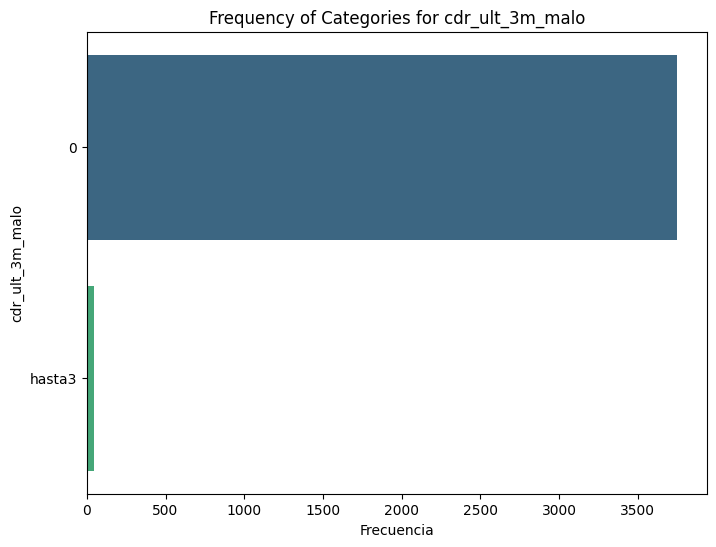

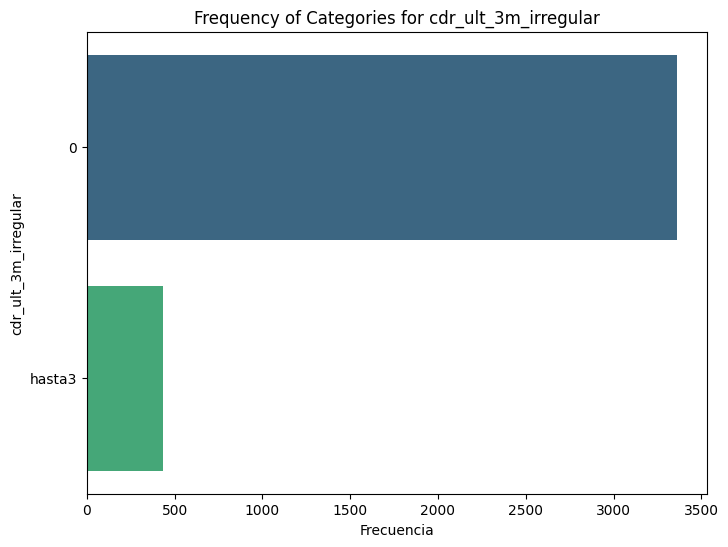

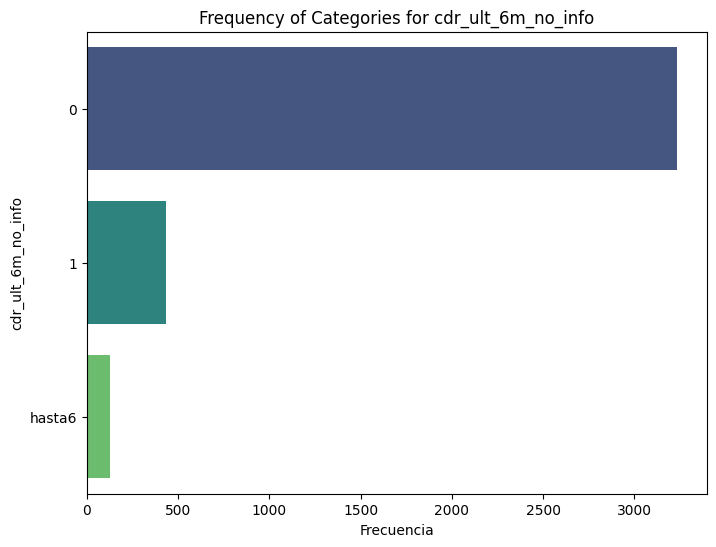

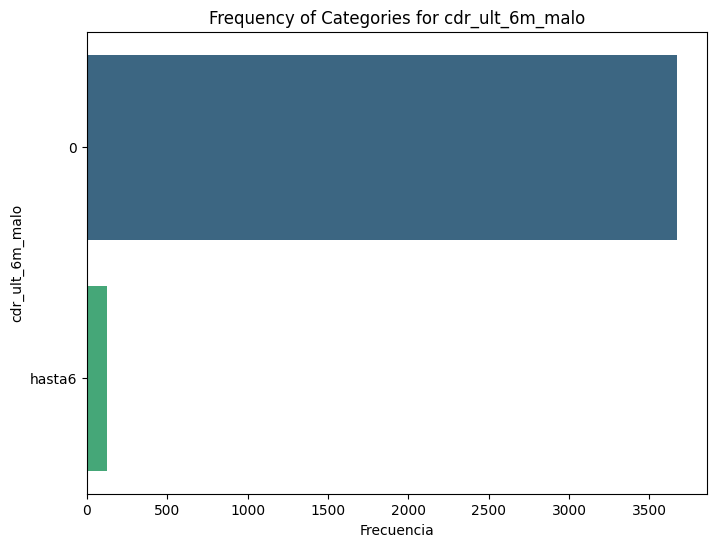

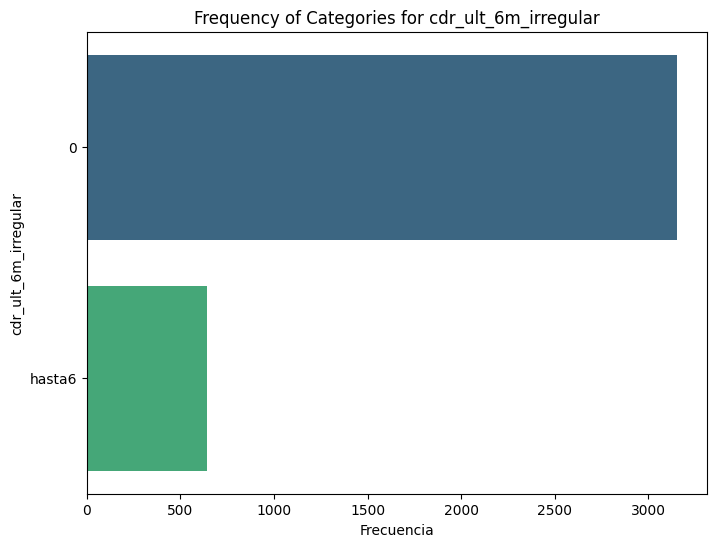

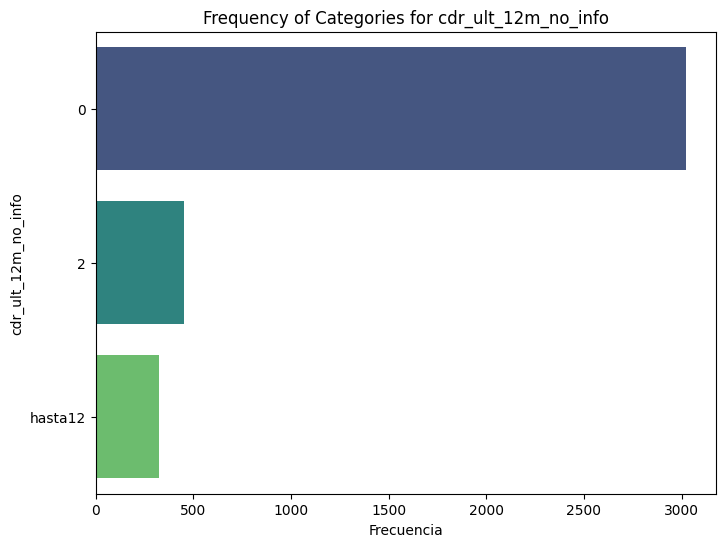

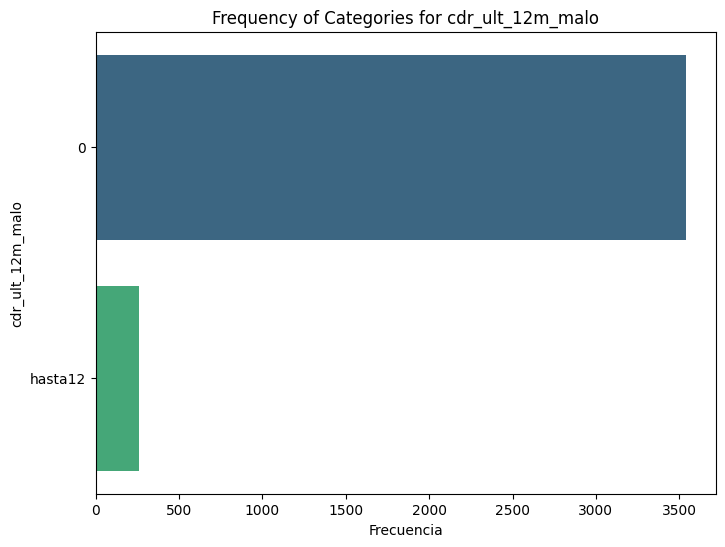

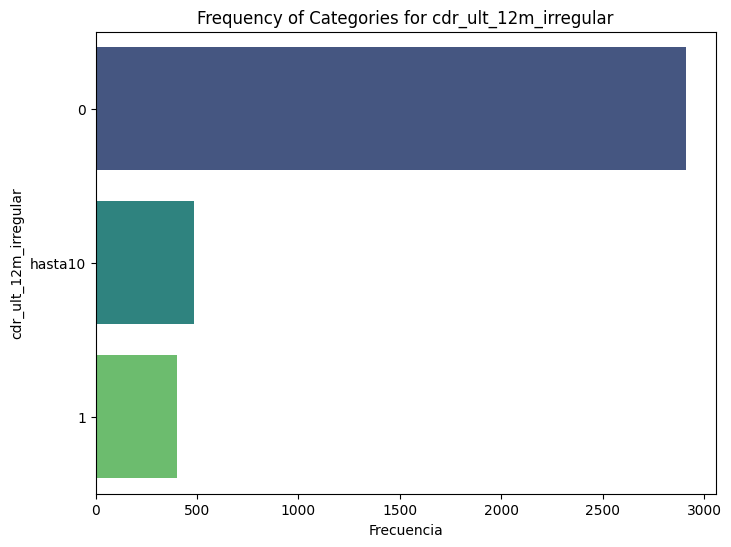

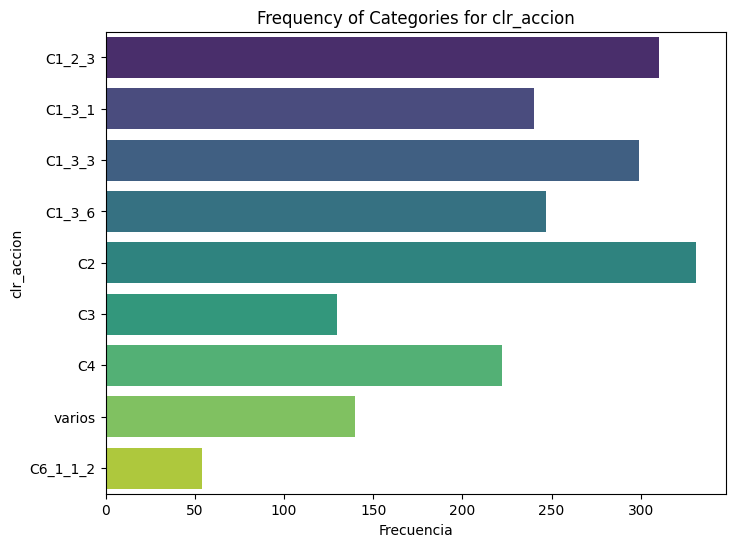

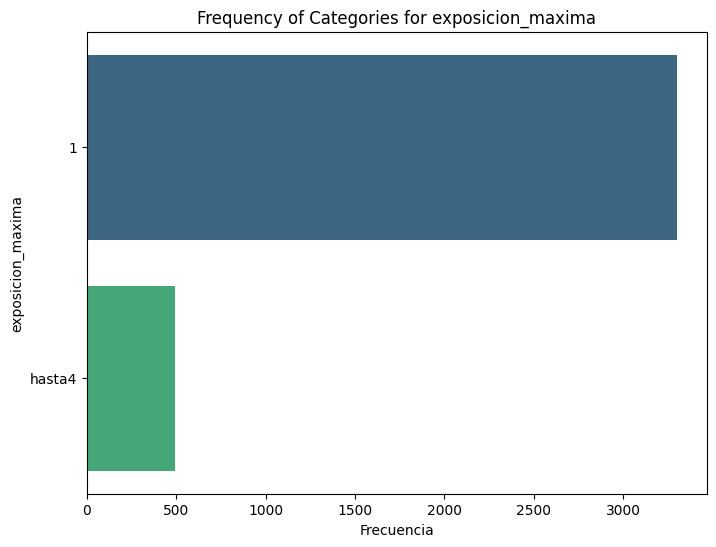

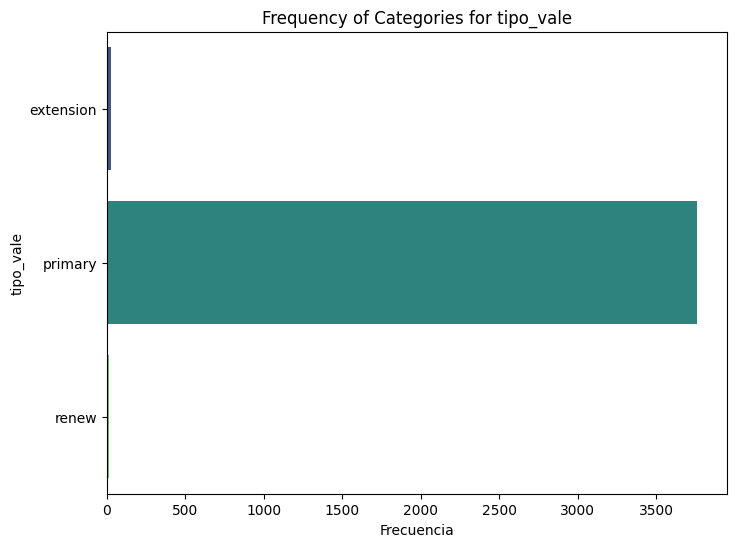

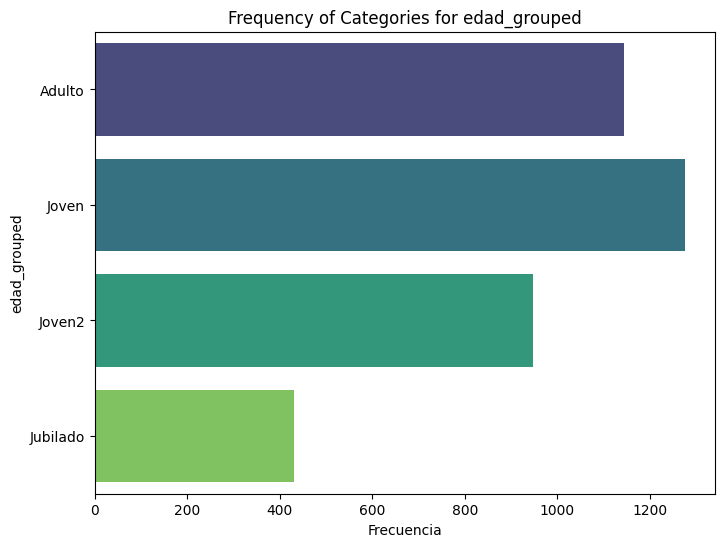

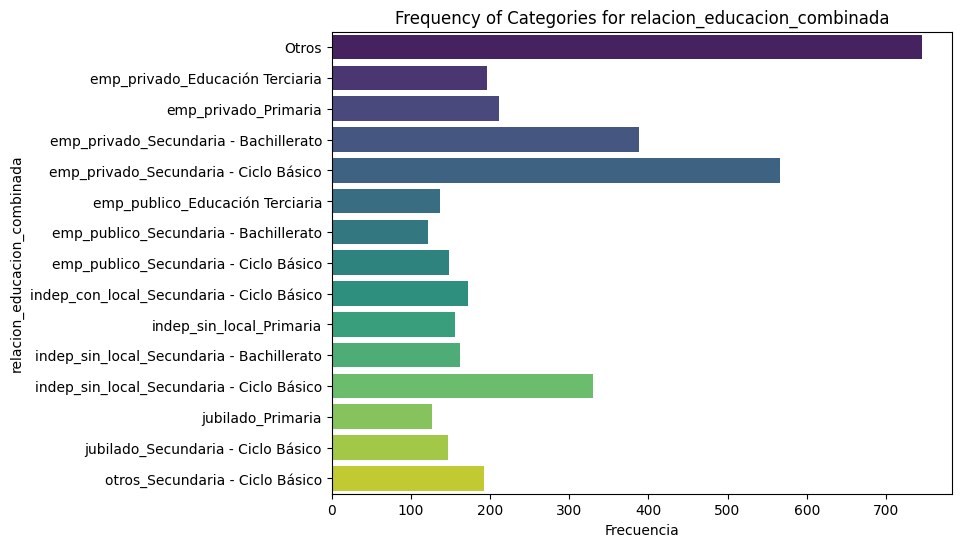

In [31]:
# Seleccionar las variables categoricas y graficarlas de manera de observar la frecuencia de cada categoria

# Select categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables categóricas:")
print(categorical_cols)

# Plot frequency distribution for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(8, 6))

    # Calculate value counts and reset index for plotting
    counts = df[col].value_counts().reset_index()
    counts.columns = ['Category', 'Frequency'] # Rename columns

    # Plot using seaborn.barplot with corrected palette usage
    sns.barplot(data=counts, x='Frequency', y='Category', hue='Category', palette='viridis', legend=False)

    plt.title(f'Frequency of Categories for {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

## VISUALIZACIÓN DE NUMÉRICAS

In [32]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nEstadísticas descriptivas de las variables numéricas:")
display(df[numeric_cols].describe())


Estadísticas descriptivas de las variables numéricas:


,rpf_alert,edad,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_cant_inst_dda,cdr_porc_dda_1c,cdr_sum_deudas_1c_ui,cdr_ult_3m_1c,cdr_ult_6m_1c,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_var_dda_ult_12m,cdr_segmento,clr_score,monto_hasta,plazo_hasta,cuota_maxima,monto_maximo,mejor_esquema_pricing,monto,plazo,cuota,tasa
count,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00
mean,0.03,43.29,31319.59,39103.40,511.46,0.11,4733.79,24445.16,0.38,0.61,0.27,0.64,1.25,0.35,11547.37,2.26,4.42,2.12,8.65,3.13,5.00,340.47,62885.40,20.02,7467.38,38093.08,7.17,31693.29,15.36,3524.69,0.35
std,0.17,12.81,17239.07,30798.28,100.55,0.31,7461.80,28710.75,0.48,0.49,0.44,0.48,1.97,0.48,23652.86,1.09,2.17,3.81,4.36,4.27,2.14,342.76,25130.53,2.36,4419.79,21924.90,1.68,18455.95,4.87,1761.22,0.48
min,0.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00,1.00,0.00,15185.00,15.00,727.00,6600.00,2.00,5000.00,6.00,777.00,0.00
25%,0.00,32.00,19560.00,25000.00,429.00,0.00,82.50,4427.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,4.00,0.00,7.00,0.00,4.00,0.00,44001.00,19.00,4629.00,22600.00,6.00,19600.00,12.00,2335.00,0.00
50%,0.00,42.00,25765.00,32000.00,507.00,0.00,1599.00,14353.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,3.00,6.00,0.00,11.00,0.00,5.00,450.00,60516.00,19.00,6269.00,32000.00,7.00,26800.00,15.00,3131.00,0.00
75%,0.00,53.00,37816.50,45000.00,587.00,0.00,6317.50,34000.50,1.00,1.00,1.00,1.00,2.00,1.00,11825.50,3.00,6.00,2.00,12.00,10.00,7.00,656.00,76450.00,20.00,9034.50,47600.00,9.00,40000.00,19.00,4262.00,1.00
max,1.00,82.00,143284.00,560000.00,795.00,1.00,62091.00,243862.00,1.00,1.00,1.00,1.00,11.00,1.00,149595.00,3.00,6.00,10.00,12.00,10.00,10.00,940.00,199615.00,29.00,36316.00,199700.00,14.00,190900.00,28.00,21856.00,1.00


In [33]:
#Convertir todas las variables numericas en formato integer

# Round all numeric columns to the nearest integer and convert to int
for col in df.columns:
    # Check if the column has a numeric data type (excluding datetime64[ns])
    if pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_datetime64_any_dtype(df[col]):
        # Round the column to the nearest integer and convert to int
        df[col] = df[col].round(0).astype(int)

print("All numeric columns in the DataFrame have been rounded to the nearest integer.")
display(df.head())

All numeric columns in the DataFrame have been rounded to the nearest integer.


,fecha_ymd,rpf_alert,edad,genero,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,sist_op_familia,departamento,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_cant_inst_dda,cdr_porc_dda_1c,cdr_sum_deudas_1c_ui,cdr_peorcatbcu1m,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,clr_score,clr_accion,monto_hasta,plazo_hasta,exposicion_maxima,cuota_maxima,monto_maximo,mejor_esquema_pricing,monto,plazo,cuota,tasa,tipo_vale,edad_grouped,relacion_educacion_combinada
id_financial,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60556.00,2024-01-21,0,31,femenino,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712,20000,402,0,CLARO,gmail.com,Web,Android,K,Android,MONTEVIDEO,857,17199,0,1,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,NaN,31122,15,1,5640,30800,13,20000,12,2895,1,primary,Joven,indep_sin_local_Secundaria - Bachillerato
60746.00,2024-01-21,0,48,femenino,Primaria,emp_privado,Otros,28487,25500,531,0,MOVISTAR,gmail.com,Web,Android,K,Android,MONTEVIDEO,0,107,0,0,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,NaN,36713,21,1,9116,36800,13,25000,21,2709,1,primary,Adulto,emp_privado_Primaria
60557.00,2024-01-21,0,41,masculino,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,46713,60000,508,0,ANTEL,gmail.com,Web,Apple,iPh,iOS,MONTEVIDEO,5611,100232,1,1,1,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,NaN,26454,15,hasta4,9648,26500,13,26500,12,3780,1,primary,Joven2,emp_publico_Secundaria - Ciclo Básico
60552.00,2024-01-22,0,25,femenino,Secundaria - Ciclo Básico,indep_con_local,Empleo doméstico / Limpiador,24683,27000,448,0,ANTEL,gmail.com,Web,Android,K,Android,COLONIA,1396,29710,1,0,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,NaN,43190,18,1,6417,42900,13,42000,18,4808,1,primary,Joven,indep_con_local_Secundaria - Ciclo Básico
60566.00,2024-01-22,0,39,femenino,Secundaria - Ciclo Básico,indep_sin_local,Cocinero,23254,30000,402,0,MOVISTAR,gmail.com,Web,Android,Mot,Android,MONTEVIDEO,1156,7679,0,1,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,NaN,33827,21,1,6913,33900,13,33500,21,3560,1,primary,Joven2,indep_sin_local_Secundaria - Ciclo Básico


#Manejo de outliers

In [34]:
# Definir numerocas con valores (0 y 1) como categoricas o boolean,

# Identificar columnas con valores 0 y 1 que potencialmente son boolean o categóricas binarias
binary_cols = []
for col in df.columns:
    # Check if the column is numeric and has only two unique values (0 and 1)
    if pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() == 2 and set(df[col].unique()).issubset({0, 1}):
        binary_cols.append(col)

print("\nColumnas numéricas con solo valores 0 y 1 (potenciales boolean o categóricas binarias):")
print(binary_cols)

# Convertir estas columnas a tipo 'category' para tratarlas como categóricas binarias
for col in binary_cols:
    df[col] = df[col].astype('category')

print("\nColumnas convertidas a tipo 'category':")
print(df.select_dtypes(include='category').columns)

print("\nInfo del DataFrame después de la conversión:")
#df.info()



Columnas numéricas con solo valores 0 y 1 (potenciales boolean o categóricas binarias):
['rpf_alert', 'tiene_tel_fijo', 'cdr_tiene_brou', 'cdr_tiene_banco_privado', 'cdr_tiene_oca', 'cdr_tiene_financiera', 'cdr_porc_dda_1c', 'tasa']

Columnas convertidas a tipo 'category':
Index(['rpf_alert', 'genero', 'nivel_educativo', 'relacion_laboral', 'cargo',
       'tiene_tel_fijo', 'cel_carrier', 'email_dominio', 'navegador_familia',
       'dispositivo_marca', 'dispositivo_familia', 'sist_op_familia',
       'departamento', 'cdr_tiene_brou', 'cdr_tiene_banco_privado',
       'cdr_tiene_oca', 'cdr_tiene_financiera', 'cdr_porc_dda_1c',
       'cdr_peorcatbcu1m', 'clr_accion', 'tasa', 'tipo_vale', 'edad_grouped',
       'relacion_educacion_combinada'],
      dtype='object')

Info del DataFrame después de la conversión:


In [35]:
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]

print("Columnas en el DataFrame con un único valor único:")
if single_value_columns:
    for col in single_value_columns:
        unique_value = df[col].unique()[0]
        print(f"- '{col}': El único valor es '{unique_value}'")
else:
    print("No se encontraron columnas con un único valor único.")

list_of_single_value_columns = single_value_columns

Columnas en el DataFrame con un único valor único:
No se encontraron columnas con un único valor único.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3799 entries, 60556.0 to 69385.0
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fecha_ymd                     3799 non-null   datetime64[ns]
 1   rpf_alert                     3799 non-null   category      
 2   edad                          3799 non-null   int64         
 3   genero                        3799 non-null   category      
 4   nivel_educativo               3796 non-null   category      
 5   relacion_laboral              3796 non-null   category      
 6   cargo                         3796 non-null   category      
 7   ingreso_estimado              3799 non-null   int64         
 8   ingreso_declarado             3799 non-null   int64         
 9   scoring                       3799 non-null   int64         
 10  tiene_tel_fijo                3799 non-null   category      
 11  cel_carrier               

In [37]:
import numpy as np

# Identify columns to EXCLUDE from being treated as numerical for capping
excluded_dtypes = ['object', 'category', 'bool', 'datetime64[ns]'] # Also exclude datetime columns

# Select all columns and filter to keep only those whose dtype is NOT in the excluded list
# This effectively selects strictly numerical columns (int, float, etc.)
strictly_numerical_cols = [col for col in df.columns if df[col].dtype not in excluded_dtypes]

# Reassign numerical_cols to the strictly numerical ones for capping
numerical_cols = strictly_numerical_cols


# Apply IQR-based capping to numerical columns in df
print(f"Applying IQR-based capping to the following columns: {numerical_cols}")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("\nIQR-based capping applied to strictly numerical columns.")

Applying IQR-based capping to the following columns: ['edad', 'ingreso_estimado', 'ingreso_declarado', 'scoring', 'cdr_max_contingencia_ui', 'cdr_sum_deudas_ui', 'cdr_cant_inst_dda', 'cdr_sum_deudas_1c_ui', 'cdr_ult_3m_1c', 'cdr_ult_6m_1c', 'cdr_var_dda_ult_6m', 'cdr_ult_12m_1c', 'cdr_var_dda_ult_12m', 'cdr_segmento', 'clr_score', 'monto_hasta', 'plazo_hasta', 'cuota_maxima', 'monto_maximo', 'mejor_esquema_pricing', 'monto', 'plazo', 'cuota']

IQR-based capping applied to strictly numerical columns.


In [38]:
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]

print("Columnas en el DataFrame con un único valor único:")
if single_value_columns:
    for col in single_value_columns:
        unique_value = df[col].unique()[0]
        print(f"- '{col}': El único valor es '{unique_value}'")
else:
    print("No se encontraron columnas con un único valor único.")

list_of_single_value_columns = single_value_columns

Columnas en el DataFrame con un único valor único:
No se encontraron columnas con un único valor único.


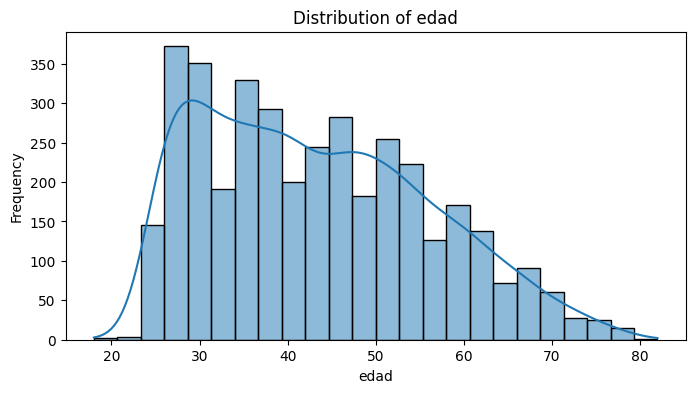

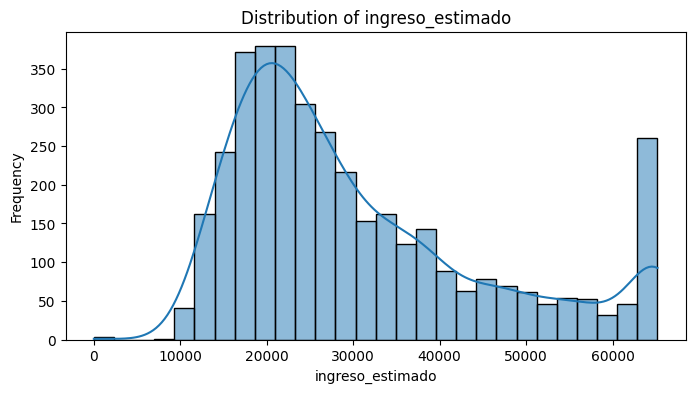

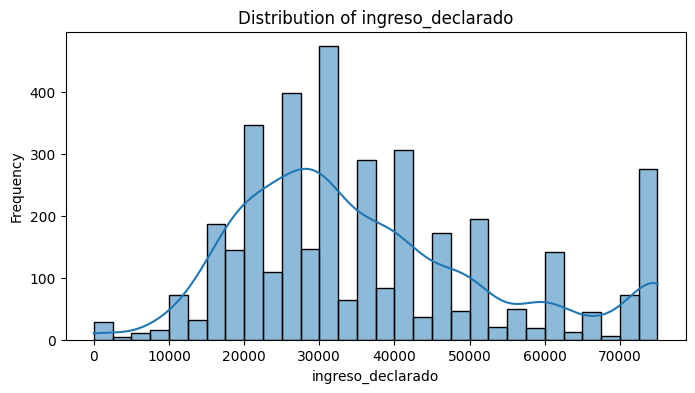

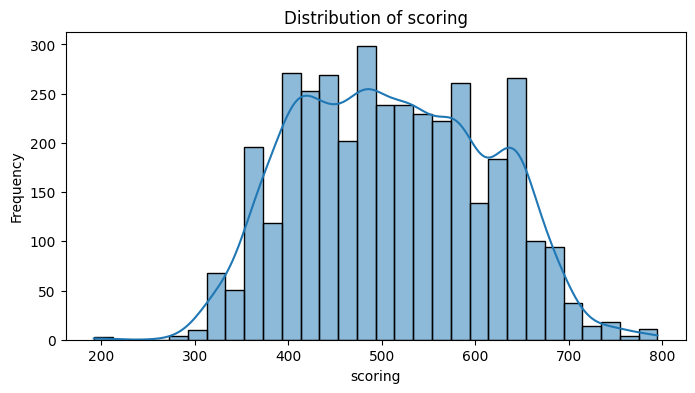

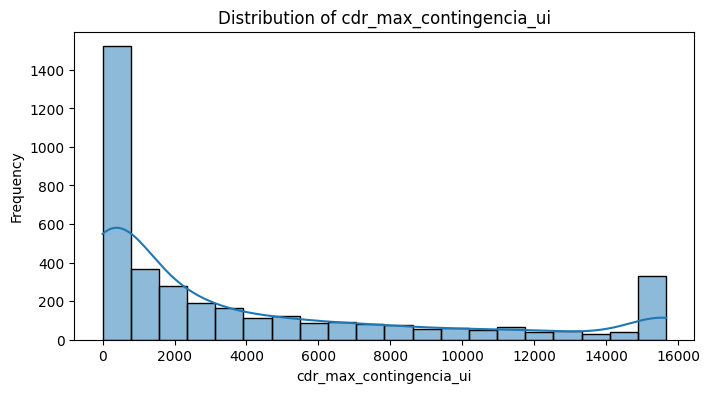

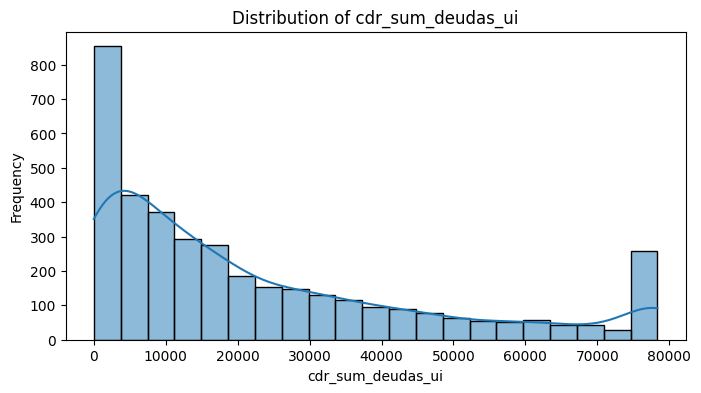

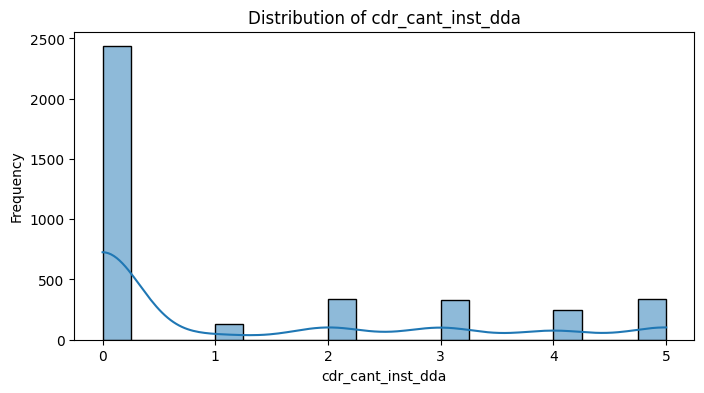

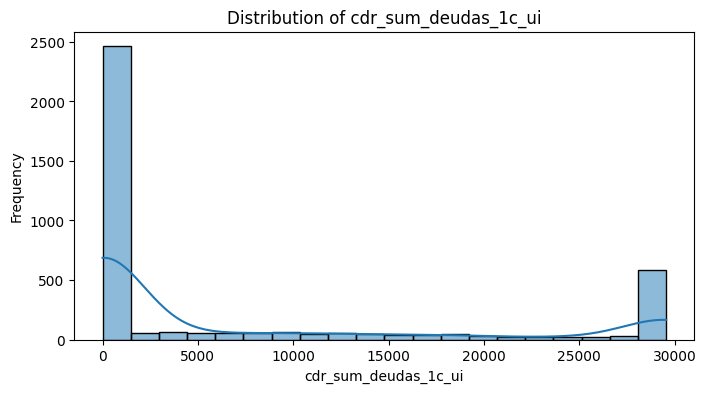

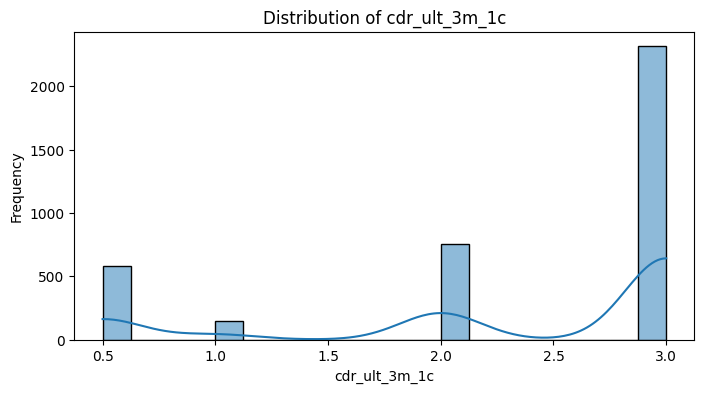

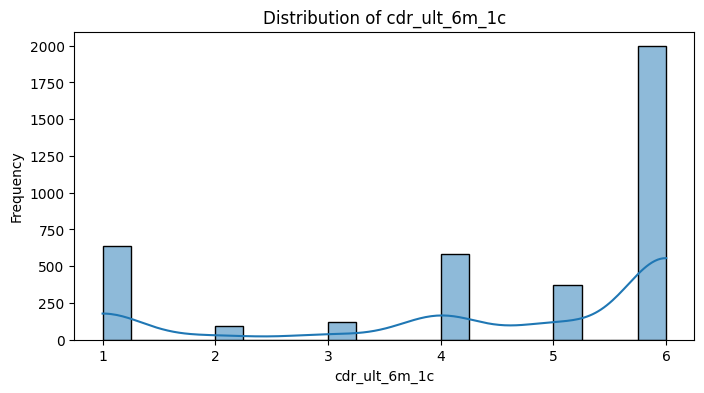

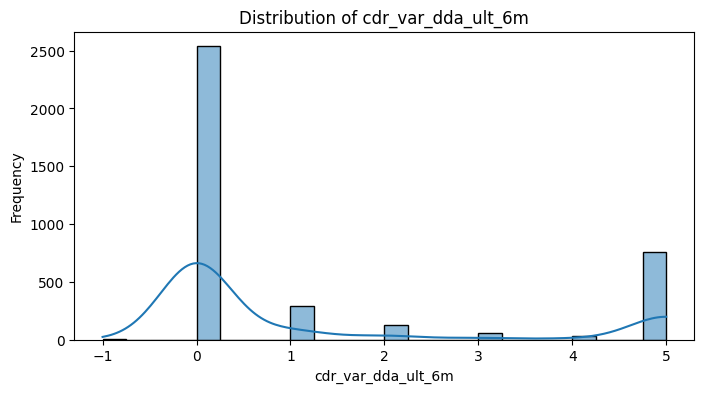

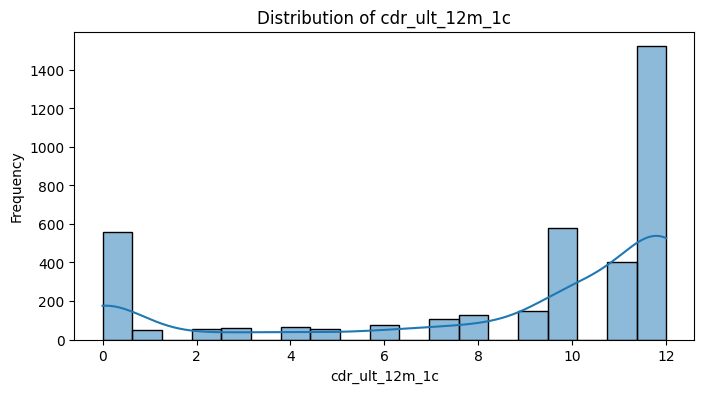

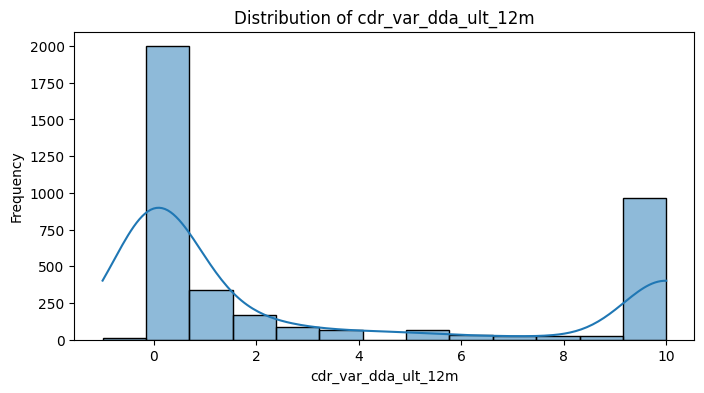

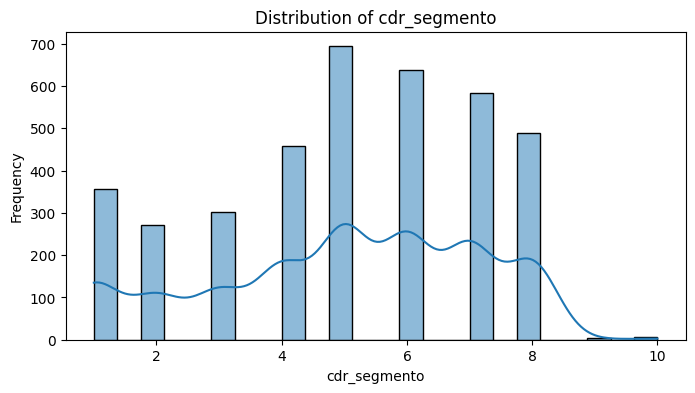

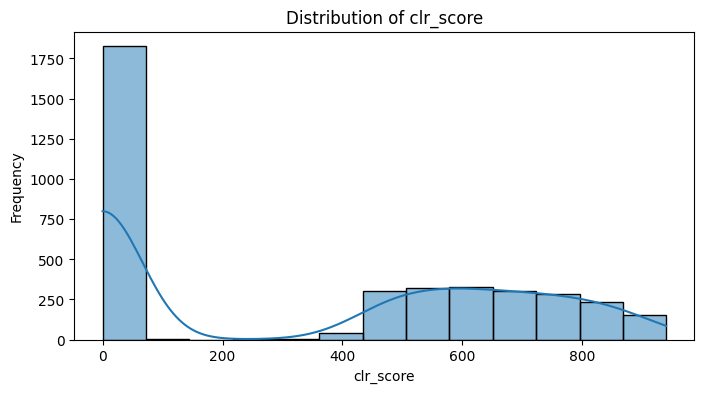

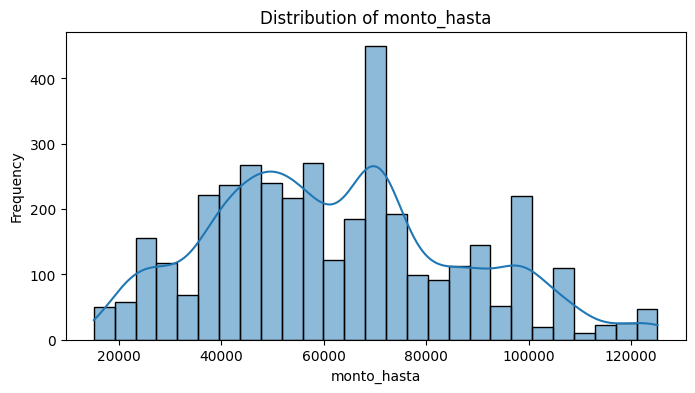

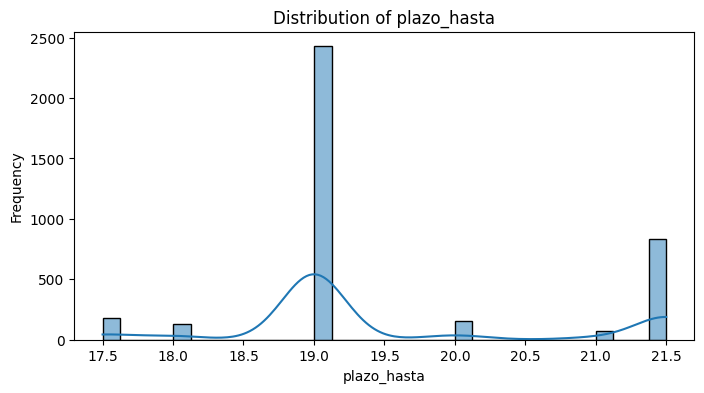

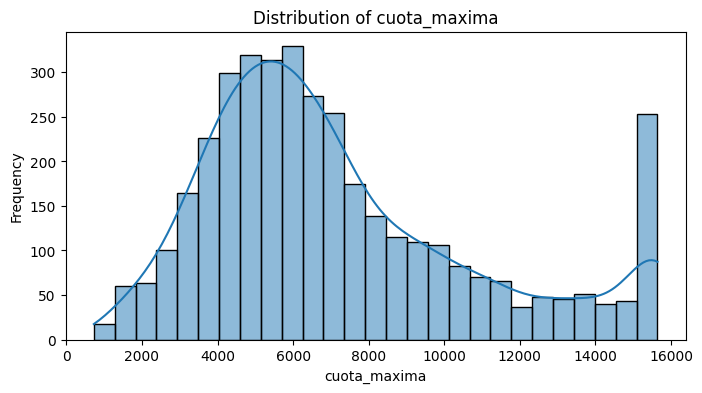

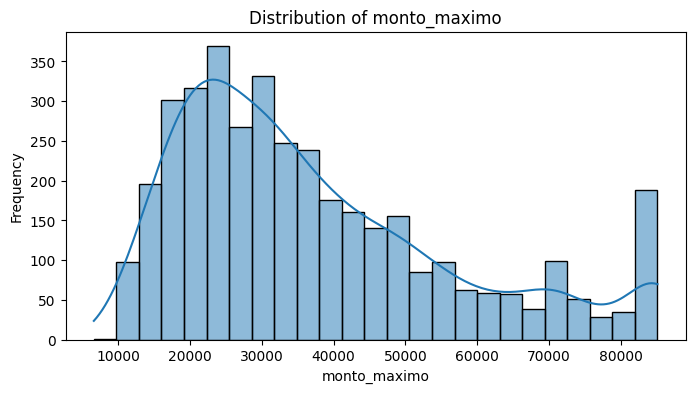

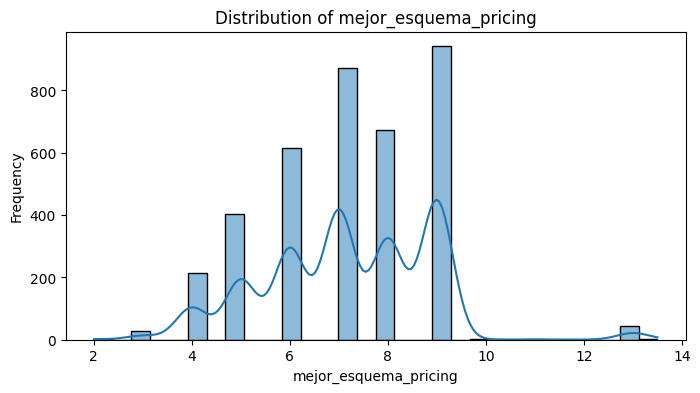

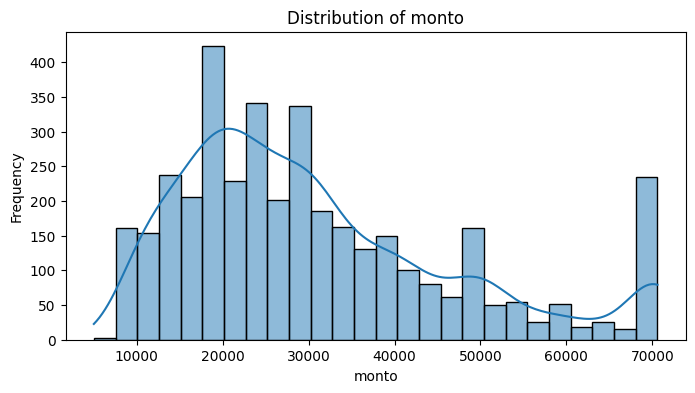

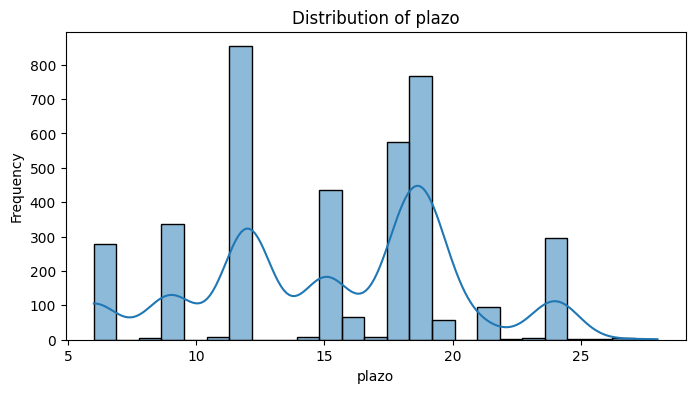

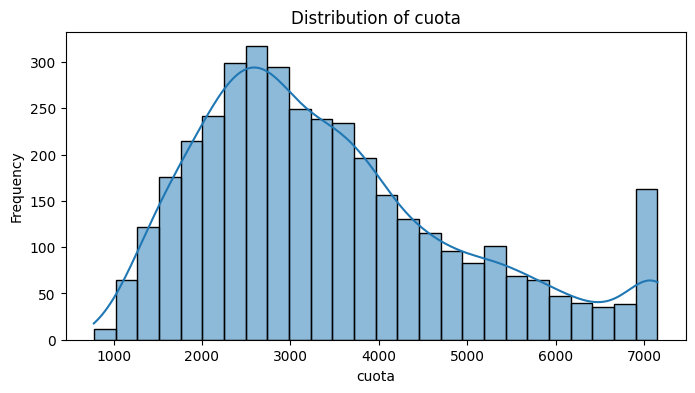

In [39]:
# Plot histograms for the selected numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [40]:
#Agrupar las variables numericas por deciles, cuando corresponda, de manera de evidencia comportamientos en posterior analisis
# Variable para indicar la segmentación de quantiles elegida, aplica al resto del codigo

num_quantiles = 4
# ---------------------------------------------

def bin_numeric_to_quantiles(df, column_name, q):
  """
  Creates quantile bins for a given numeric column in a DataFrame,
  labeling bins with value ranges.

  Args:
    df: The input pandas DataFrame.
    column_name: The name of the numeric column to bin.
    q: The number of quantiles.

  Returns:
    None. The function modifies the DataFrame in place by adding a new
    column with the quantile bin ranges as labels.
  """
  if column_name in df.columns and pd.api.types.is_numeric_dtype(df[column_name]):
    try:
      # Create quantile bins with interval labels
      df[f'{column_name}_{q}quantile'] = pd.qcut(df[column_name], q=q, labels=None, duplicates='drop') # labels=None for interval ranges
      print(f"Created {q}-quantile bins for column '{column_name}' as '{column_name}_{q}quantile'")
      print(f"\nValue counts and ranges for '{column_name}_{q}quantile':")
      print(df[f'{column_name}_{q}quantile'].value_counts().sort_index())
    except ValueError as e:
      print(f"Could not create {q}-quantile bins for column '{column_name}': {e}")
      print(f"This might happen if there are too many identical values for {q} quantiles.")
      # Optionally, you could create fewer bins or handle this column differently
  else:
    print(f"Column '{column_name}' not found or is not numeric.")

# Identify numeric columns (excluding the binary ones we converted to category)
# We'll use the 'strictly_numerical_cols' identified earlier for capping as they are the ones
# where quantile binning makes sense.
# Ensure 'strictly_numerical_cols' is defined or redefine it if necessary
if 'strictly_numerical_cols' not in locals():
     all_numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
     excluded_dtypes = ['object', 'category', 'bool']
     cols_to_exclude = df.select_dtypes(include=excluded_dtypes).columns.tolist()
     strictly_numerical_cols = [col for col in all_numerical_cols if col not in cols_to_exclude]

print(f"\nApplying {num_quantiles}-quantile binning to the following strictly numerical columns:")
print(strictly_numerical_cols)

for col in strictly_numerical_cols:
    # Pass the configured number of quantiles to the function
    bin_numeric_to_quantiles(df, col, q=num_quantiles)

print("\nFirst 5 rows of the DataFrame with new quantile columns:")
display(df.head())


Applying 4-quantile binning to the following strictly numerical columns:
['edad', 'ingreso_estimado', 'ingreso_declarado', 'scoring', 'cdr_max_contingencia_ui', 'cdr_sum_deudas_ui', 'cdr_cant_inst_dda', 'cdr_sum_deudas_1c_ui', 'cdr_ult_3m_1c', 'cdr_ult_6m_1c', 'cdr_var_dda_ult_6m', 'cdr_ult_12m_1c', 'cdr_var_dda_ult_12m', 'cdr_segmento', 'clr_score', 'monto_hasta', 'plazo_hasta', 'cuota_maxima', 'monto_maximo', 'mejor_esquema_pricing', 'monto', 'plazo', 'cuota']
Created 4-quantile bins for column 'edad' as 'edad_4quantile'

Value counts and ranges for 'edad_4quantile':
edad_4quantile
(17.999, 32.0]    978
(32.0, 42.0]      999
(42.0, 53.0]      947
(53.0, 82.0]      875
Name: count, dtype: int64
Created 4-quantile bins for column 'ingreso_estimado' as 'ingreso_estimado_4quantile'

Value counts and ranges for 'ingreso_estimado_4quantile':
ingreso_estimado_4quantile
(-0.001, 19560.0]      951
(19560.0, 25765.0]     949
(25765.0, 37816.5]     949
(37816.5, 65201.25]    950
Name: count, d

,fecha_ymd,rpf_alert,edad,genero,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,sist_op_familia,departamento,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_cant_inst_dda,cdr_porc_dda_1c,cdr_sum_deudas_1c_ui,cdr_peorcatbcu1m,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,clr_score,clr_accion,monto_hasta,plazo_hasta,exposicion_maxima,cuota_maxima,monto_maximo,mejor_esquema_pricing,monto,plazo,cuota,tasa,tipo_vale,edad_grouped,relacion_educacion_combinada,edad_4quantile,ingreso_estimado_4quantile,ingreso_declarado_4quantile,scoring_4quantile,cdr_max_contingencia_ui_4quantile,cdr_sum_deudas_ui_4quantile,cdr_cant_inst_dda_4quantile,cdr_sum_deudas_1c_ui_4quantile,cdr_ult_3m_1c_4quantile,cdr_ult_6m_1c_4quantile,cdr_var_dda_ult_6m_4quantile,cdr_ult_12m_1c_4quantile,cdr_var_dda_ult_12m_4quantile,cdr_segmento_4quantile,clr_score_4quantile,monto_hasta_4quantile,plazo_hasta_4quantile,cuota_maxima_4quantile,monto_maximo_4quantile,mejor_esquema_pricing_4quantile,monto_4quantile,plazo_4quantile,cuota_4quantile
id_financial,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60556.00,2024-01-21,0,31.00,femenino,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712.00,20000.00,402.00,0,CLARO,gmail.com,Web,Android,K,Android,MONTEVIDEO,857.00,17199.00,0,1,0,1,0.00,0,0.00,NaN,0.50,0,0,0,1.00,0,0,0,0.00,0.00,0,0,0,0.00,6.00,0.00,NaN,31122.00,17.50,1,5640.00,30800.00,13.00,20000.00,12.00,2895.00,1,primary,Joven,indep_sin_local_Secundaria - Bachillerato,"(17.999, 32.0]","(19560.0, 25765.0]","(-0.001, 25000.0]","(191.999, 429.0]","(82.5, 1599.0]","(14353.0, 34000.5]","(-0.001, 2.0]","(-0.001, 11825.5]","(0.499, 2.0]","(0.999, 4.0]","(-1.001, 0.0]","(-0.001, 7.0]","(-1.001, 0.0]","(5.0, 7.0]","(-0.001, 450.0]","(15184.999, 44001.0]","(17.499, 19.0]","(4629.0, 6269.0]","(22600.0, 32000.0]","(9.0, 13.5]","(19600.0, 26800.0]","(5.999, 12.0]","(2335.0, 3131.0]"
60746.00,2024-01-21,0,48.00,femenino,Primaria,emp_privado,Otros,28487.00,25500.00,531.00,0,MOVISTAR,gmail.com,Web,Android,K,Android,MONTEVIDEO,0.00,107.00,0,0,0,1,0.00,0,0.00,NaN,0.50,0,0,0,1.00,0,0,0,0.00,0.00,0,0,0,0.00,7.00,0.00,NaN,36713.00,21.00,1,9116.00,36800.00,13.00,25000.00,21.00,2709.00,1,primary,Adulto,emp_privado_Primaria,"(42.0, 53.0]","(25765.0, 37816.5]","(25000.0, 32000.0]","(507.0, 587.0]","(-0.001, 82.5]","(-0.001, 4427.5]","(-0.001, 2.0]","(-0.001, 11825.5]","(0.499, 2.0]","(0.999, 4.0]","(-1.001, 0.0]","(-0.001, 7.0]","(-1.001, 0.0]","(5.0, 7.0]","(-0.001, 450.0]","(15184.999, 44001.0]","(20.0, 21.5]","(9034.5, 15642.75]","(32000.0, 47600.0]","(9.0, 13.5]","(19600.0, 26800.0]","(19.0, 28.0]","(2335.0, 3131.0]"
60557.00,2024-01-21,0,41.00,masculino,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,46713.00,60000.00,508.00,0,ANTEL,gmail.com,Web,Apple,iPh,iOS,MONTEVIDEO,5611.00,78360.00,1,1,1,1,0.00,0,0.00,NaN,0.50,0,0,0,1.00,0,0,0,0.00,0.00,0,0,0,0.00,7.00,0.00,NaN,26454.00,17.50,hasta4,9648.00,26500.00,13.00,26500.00,12.00,3780.00,1,primary,Joven2,emp_publico_Secundaria - Ciclo Básico,"(32.0, 42.0]","(37816.5, 65201.25]","(45000.0, 75000.0]","(507.0, 587.0]","(1599.0, 6317.5]","(34000.5, 78360.0]","(-0.001, 2.0]","(-0.001, 11825.5]","(0.499, 2.0]","(0.999, 4.0]","(-1.001, 0.0]","(-0.001, 7.0]","(-1.001, 0.0]","(5.0, 7.0]","(-0.001, 450.0]","(15184.999, 44001.0]","(17.499, 19.0]","(9034.5, 15642.75]","(22600.0, 32000.0]","(9.0, 13.5]","(19600.0, 26800.0]","(5.999, 12.0]","(3131.0, 4262.0]"
60552.00,2024-01-22,0,25.00,femenino,Secundaria - Ciclo Básico,indep_con_local,Empleo doméstico / 

In [41]:
# Drop the original strictly numerical columns after creating decile bins

if 'strictly_numerical_cols' in locals():
    columns_to_drop_original_numerical = strictly_numerical_cols
    print(f"Dropping the following original numerical columns: {columns_to_drop_original_numerical}")
    df = df.drop(columns=columns_to_drop_original_numerical, errors='ignore')
    print(f"Shape of the DataFrame after dropping original numerical columns: {df.shape}")
else:
    print("The list 'strictly_numerical_cols' was not found. Please ensure the cell that defines this list (Qy9FP7nEMZ2V) has been executed.")

print("\nFirst 5 rows of the DataFrame after dropping original numerical columns:")
display(df.head())

Dropping the following original numerical columns: ['edad', 'ingreso_estimado', 'ingreso_declarado', 'scoring', 'cdr_max_contingencia_ui', 'cdr_sum_deudas_ui', 'cdr_cant_inst_dda', 'cdr_sum_deudas_1c_ui', 'cdr_ult_3m_1c', 'cdr_ult_6m_1c', 'cdr_var_dda_ult_6m', 'cdr_ult_12m_1c', 'cdr_var_dda_ult_12m', 'cdr_segmento', 'clr_score', 'monto_hasta', 'plazo_hasta', 'cuota_maxima', 'monto_maximo', 'mejor_esquema_pricing', 'monto', 'plazo', 'cuota']
Shape of the DataFrame after dropping original numerical columns: (3799, 58)

First 5 rows of the DataFrame after dropping original numerical columns:


,fecha_ymd,rpf_alert,genero,nivel_educativo,relacion_laboral,cargo,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,sist_op_familia,departamento,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_porc_dda_1c,cdr_peorcatbcu1m,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,clr_accion,exposicion_maxima,tasa,tipo_vale,edad_grouped,relacion_educacion_combinada,edad_4quantile,ingreso_estimado_4quantile,ingreso_declarado_4quantile,scoring_4quantile,cdr_max_contingencia_ui_4quantile,cdr_sum_deudas_ui_4quantile,cdr_cant_inst_dda_4quantile,cdr_sum_deudas_1c_ui_4quantile,cdr_ult_3m_1c_4quantile,cdr_ult_6m_1c_4quantile,cdr_var_dda_ult_6m_4quantile,cdr_ult_12m_1c_4quantile,cdr_var_dda_ult_12m_4quantile,cdr_segmento_4quantile,clr_score_4quantile,monto_hasta_4quantile,plazo_hasta_4quantile,cuota_maxima_4quantile,monto_maximo_4quantile,mejor_esquema_pricing_4quantile,monto_4quantile,plazo_4quantile,cuota_4quantile
id_financial,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60556.00,2024-01-21,0,femenino,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,0,CLARO,gmail.com,Web,Android,K,Android,MONTEVIDEO,0,1,0,1,0,NaN,0,0,0,0,0,0,0,0,0,NaN,1,1,primary,Joven,indep_sin_local_Secundaria - Bachillerato,"(17.999, 32.0]","(19560.0, 25765.0]","(-0.001, 25000.0]","(191.999, 429.0]","(82.5, 1599.0]","(14353.0, 34000.5]","(-0.001, 2.0]","(-0.001, 11825.5]","(0.499, 2.0]","(0.999, 4.0]","(-1.001, 0.0]","(-0.001, 7.0]","(-1.001, 0.0]","(5.0, 7.0]","(-0.001, 450.0]","(15184.999, 44001.0]","(17.499, 19.0]","(4629.0, 6269.0]","(22600.0, 32000.0]","(9.0, 13.5]","(19600.0, 26800.0]","(5.999, 12.0]","(2335.0, 3131.0]"
60746.00,2024-01-21,0,femenino,Primaria,emp_privado,Otros,0,MOVISTAR,gmail.com,Web,Android,K,Android,MONTEVIDEO,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,NaN,1,1,primary,Adulto,emp_privado_Primaria,"(42.0, 53.0]","(25765.0, 37816.5]","(25000.0, 32000.0]","(507.0, 587.0]","(-0.001, 82.5]","(-0.001, 4427.5]","(-0.001, 2.0]","(-0.001, 11825.5]","(0.499, 2.0]","(0.999, 4.0]","(-1.001, 0.0]","(-0.001, 7.0]","(-1.001, 0.0]","(5.0, 7.0]","(-0.001, 450.0]","(15184.999, 44001.0]","(20.0, 21.5]","(9034.5, 15642.75]","(32000.0, 47600.0]","(9.0, 13.5]","(19600.0, 26800.0]","(19.0, 28.0]","(2335.0, 3131.0]"
60557.00,2024-01-21,0,masculino,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,0,ANTEL,gmail.com,Web,Apple,iPh,iOS,MONTEVIDEO,1,1,1,1,0,NaN,0,0,0,0,0,0,0,0,0,NaN,hasta4,1,primary,Joven2,emp_publico_Secundaria - Ciclo Básico,"(32.0, 42.0]","(37816.5, 65201.25]","(45000.0, 75000.0]","(507.0, 587.0]","(1599.0, 6317.5]","(34000.5, 78360.0]","(-0.001, 2.0]","(-0.001, 11825.5]","(0.499, 2.0]","(0.999, 4.0]","(-1.001, 0.0]","(-0.001, 7.0]","(-1.001, 0.0]","(5.0, 7.0]","(-0.001, 450.0]","(15184.999, 44001.0]","(17.499, 19.0]","(9034.5, 15642.75]","(22600.0, 32000.0]","(9.0, 13.5]","(19600.0, 26800.0]","(5.999, 12.0]","(3131.0, 4262.0]"
60552.00,2024-01-22,0,femenino,Secundaria - Ciclo Básico,indep_con_local,Empleo doméstico / Limpiador,0,ANTEL,gmail.com,Web,Android,K,Android,COLONIA,1,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,NaN,1,1,primary,Joven,indep_con_local_Secundaria - Ciclo Básico,"(17.999, 32.0]","(19560.0, 25765.0]","(25000.0, 32000.0]","(429.0, 507.0]","(82.5, 1599.0]","(14353.0, 34000.5]","(-0.001, 2.0]","(-0.001, 11825.5]","(0.499, 2.0]","(0.999, 4.0]","(-1.001, 0.0]","(-0.001, 7.0]","(-1.001, 0.0]","(5.0, 7.0]","(-0.001, 450.0]","(15184.999, 44001.0]","(17.499, 19.0]","(6269.0, 9034.5]","(32000.0, 47600.0]","(9.0, 13.5]","(40000.0, 70600.0]","(15.0, 19.0]","(4262.0, 7152.5]"
60566.00,2024-01-22,0,femenino,Secundaria - Ciclo Básico,indep_sin_local,Cocinero,0,MOVISTAR,gmail.com,Web,Android,Mot,Android,MONTEVIDEO,0,1,0,1,0,NaN,0,0,0,0,0,0,0,0,0,NaN,1,1,primary,Joven2,indep_sin_local_Secundaria - Ciclo Básico,"(32.0, 42.0

Categorical variables for univariate analysis by month:
['rpf_alert', 'genero', 'nivel_educativo', 'relacion_laboral', 'cargo', 'tiene_tel_fijo', 'cel_carrier', 'email_dominio', 'navegador_familia', 'dispositivo_marca', 'dispositivo_familia', 'sist_op_familia', 'departamento', 'cdr_tiene_brou', 'cdr_tiene_banco_privado', 'cdr_tiene_oca', 'cdr_tiene_financiera', 'cdr_porc_dda_1c', 'cdr_peorcatbcu1m', 'cdr_ult_3m_no_info', 'cdr_ult_3m_malo', 'cdr_ult_3m_irregular', 'cdr_ult_6m_no_info', 'cdr_ult_6m_malo', 'cdr_ult_6m_irregular', 'cdr_ult_12m_no_info', 'cdr_ult_12m_malo', 'cdr_ult_12m_irregular', 'clr_accion', 'exposicion_maxima', 'tasa', 'tipo_vale', 'edad_grouped', 'relacion_educacion_combinada', 'edad_4quantile', 'ingreso_estimado_4quantile', 'ingreso_declarado_4quantile', 'scoring_4quantile', 'cdr_max_contingencia_ui_4quantile', 'cdr_sum_deudas_ui_4quantile', 'cdr_cant_inst_dda_4quantile', 'cdr_sum_deudas_1c_ui_4quantile', 'cdr_ult_3m_1c_4quantile', 'cdr_ult_6m_1c_4quantile', 'cdr_var

<Figure size 1500x700 with 0 Axes>

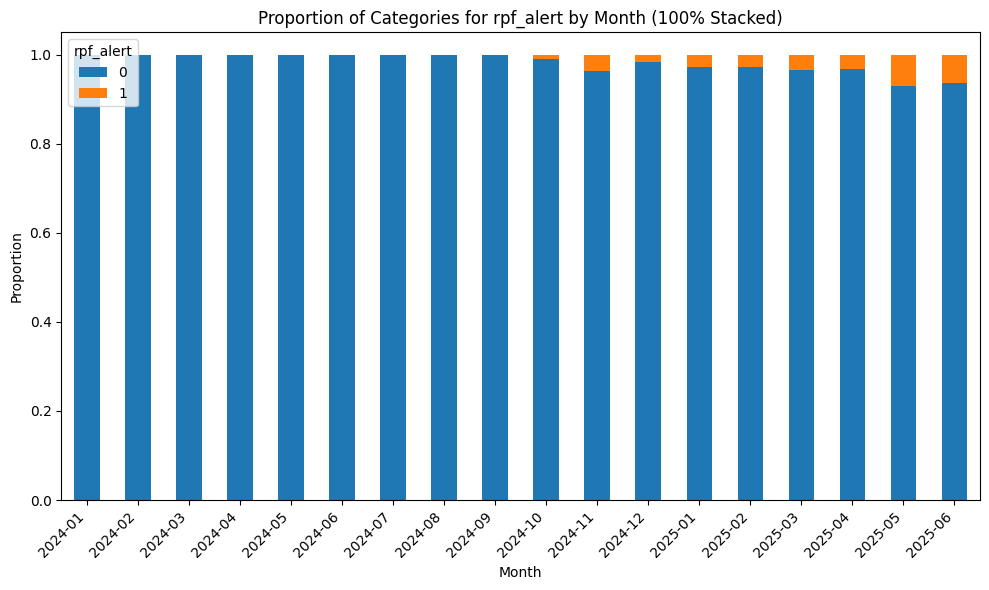

<Figure size 1500x700 with 0 Axes>

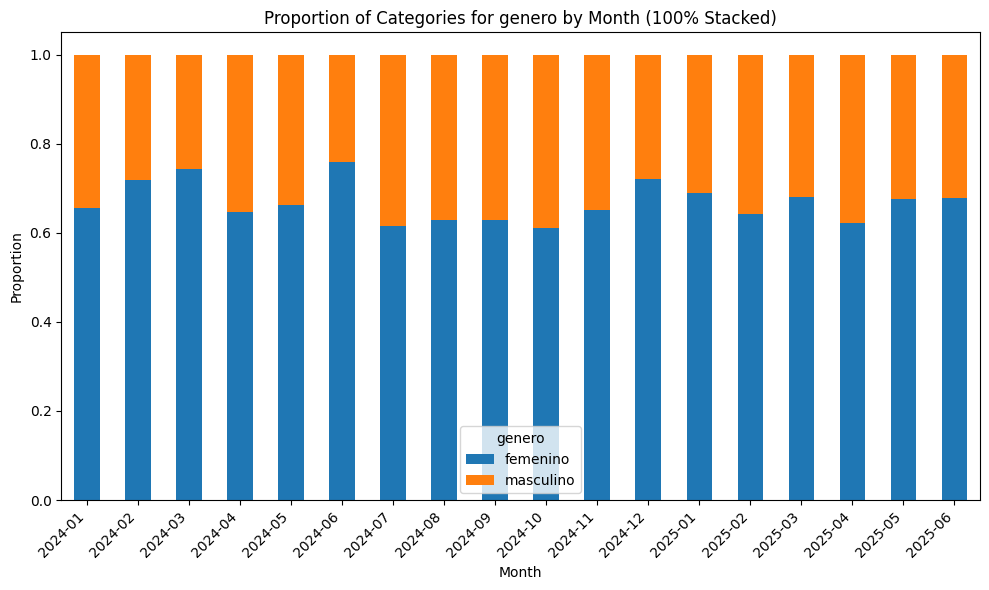

<Figure size 1500x700 with 0 Axes>

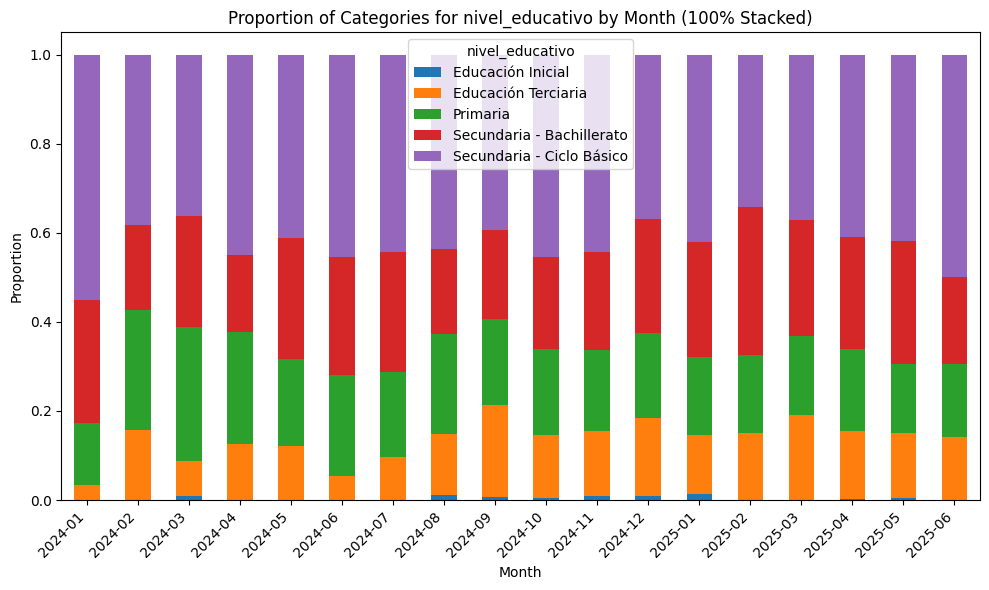

In [ ]:
# Tomar todo el df y realizar una visualización  de las variables univariado, en base a cantidad por categoria, en función del mes(fecha)
# Graficas apiladas 100% y recortar etiquetas si mejora la visualización

# Create a new column for the month of the 'fecha_ymd'
df['month'] = df['fecha_ymd'].dt.to_period('M')

# Select categorical variables (excluding the newly created 'month' column and date-like cols)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'month' in categorical_cols:
    categorical_cols.remove('month')
# Also exclude other date-like columns if they are present and categorical
date_like_cols = ['fecha_ymd', 'clr_fecha', 'clr_bp_fecha'] # Ensure date-like cols are excluded
categorical_cols = [col for col in categorical_cols if col not in date_like_cols]


print("Categorical variables for univariate analysis by month:")
print(categorical_cols)

# Function to trim long labels
# def trim_label(label, max_length=20):
#     """Trims a string label if it exceeds max_length."""
#     if isinstance(label, str) and len(label) > max_length:
#         return label[:max_length] + '...'
#     return label

# Perform univariate visualization for each categorical variable by month with 100% stacked bars
for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(15, 7)) # Adjust figure size for better readability'

    # Group by month and the current categorical column, then count occurrences
    counts_by_month = df.groupby(['month', col], observed=False).size().reset_index(name='count')

    # Create a pivot table for plotting
    pivot_counts = counts_by_month.pivot(index='month', columns=col, values='count').fillna(0)

    # Calculate proportions for 100% stacked bars
    pivot_proportions = pivot_counts.apply(lambda x: x / x.sum(), axis=1)

    # --- Debugging: Inspect pivot_proportions before plotting ---
    # if i == 0: # Inspect only for the first column to avoid excessive output
    #     print(f"\n--- Inspecting pivot_proportions for column: {col} ---")
    #     print("Shape:", pivot_proportions.shape)
    #     print("dtypes:\n", pivot_proportions.dtypes)
    #     print("Head:\n", pivot_proportions.head())
    #     print("------------------------------------------------------\n")
    # --------------------------------------------------------------

    # Reset index before plotting to use a default numeric index, potentially avoiding TypeError
    pivot_proportions_reset = pivot_proportions.reset_index()

    # Plot the 100% stacked bar chart
    # Use the reset index DataFrame and specify x and y columns
    pivot_proportions_reset.plot(kind='bar', x='month', stacked=True, figsize=(10, 6))

    plt.title(f'Proportion of Categories for {col} by Month (100% Stacked)')
    plt.xlabel('Month')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability

    # Commented out code for label trimming which was causing Attribute Error
    # # Apply label trimming to the legend
    # # Get current legend handles and labels
    # handles, labels = plt.gca().get_legend_handles_labels()
    # # Trim labels
    # trimmed_labels = [trim_label(label) for label in labels]
    # # Update legend with trimmed labels
    # plt.legend(handles, trimmed_labels, title=col, bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()